In [1]:
from bitalg.visualizer.main import Visualizer
import numpy as np
from enum import Enum

# 1. Przygotowanie zbiorów punktów

<h2>Funkcje do generacji zbiorów punktów</h2>

In [2]:
# Generate <amount> random points inside a square [corner1;corner2] x [corner1;corner2]
def randSquare(amount, corner1, corner2):
    print(np.random.uniform(corner1, corner2, (amount, 2)))
    return np.random.uniform(corner1, corner2, (amount, 2))

# Generate <amount> random points on a circle of <center> center and <radius> radius
def randCircle(amount, center, radius):
    angleArray = np.random.uniform(0, 2*np.pi, amount)
    return [(radius * np.cos(angle) + center[0], radius * np.sin(angle) + center[1]) for angle in angleArray]

# Generate <amount> random points on a line extending the (point1, point2) vector,
# that fit inside a square [minCoord;maxCoord] x [minCoord;maxCoord]
def randLine(amount, point1, point2, minCoord, maxCoord):
    # 1. x = point1[0] (x1 == x2)
    if point1[0] == point2[0]:
        return [(point1[0], y) for y in np.random.uniform(minCoord, maxCoord, amount)]

    # 2. y = point1[1] (y1 == y2)
    if point1[1] == point2[1]:
        return [(x, point1[1]) for x in np.random.uniform(minCoord, maxCoord, amount)]

    # 3. x1 != x2 && y1 != y2
    # x = point1[0] + t * vect[0]
    # y = point1[1] + t * vect[1]
    vect = (point2[0]-point1[0], point2[1]-point1[1])
    tBoundsOfX = ((minCoord - point1[0]) / vect[0], (maxCoord - point1[0]) / vect[0])
    tBoundsOfY = ((minCoord - point1[1]) / vect[1], (maxCoord - point1[1]) / vect[1])
    minT = max(min(tBoundsOfX), min(tBoundsOfY))
    maxT = min(max(tBoundsOfX), max(tBoundsOfY))
    return [(point1[0] + t * vect[0], point1[1] + t * vect[1]) for t in np.random.uniform(minT, maxT, amount)]

<h2>Wygenerowanie zbiorów punktów</h2>

a) 10<sup>5</sup> punktów o współrzędnych z przedziału [-1000; 1000]

In [3]:
pointsA = randSquare(10 ** 5, -1000, 1000)

[[-988.8067181   875.4419282 ]
 [  -2.81939809  560.32979021]
 [ 954.9144311   594.03728041]
 ...
 [-667.89535505 -416.03420388]
 [ 295.91433529 -855.8702118 ]
 [-171.27281918 -295.87295538]]


b) 10<sup>5</sup> punktów o współrzędnych z przedziału [-10<sup>14</sup>; 10<sup>14</sup>]

In [4]:
pointsB = randSquare(10 ** 5, -1e14, 1e14)

[[ 8.54688741e+13  5.11048341e+13]
 [ 2.27556967e+13  7.11553943e+13]
 [-1.97262655e+13  2.41946700e+13]
 ...
 [-6.43435143e+13 -6.94696446e+13]
 [ 8.32100168e+13 -9.97029012e+13]
 [ 6.86316489e+13  9.78682333e+13]]


c) 1000 punktów na okręgu x<sup>2</sup> + y<sup>2</sup> = 100<sup>2</sup>

In [5]:
pointsC = randCircle(1000, (0,0), 100)

d) 1000 punktów o współrzędnych z przedziału [-1000; 1000] leżącej na prostej wyznaczonej przez wektor (a, b)
</br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a = (-1.0, 0.0), b = (1.0, 0.1)

In [6]:
pointsD = randLine(1000, (-1.0, 0.0), (1.0, 0.1), -1000, 1000)

# 2. Wizualizacja utworzonych zbiorów punktów

<h2>Funkcja rysowania punktów</h2>

In [7]:
def drawPoints(points):
    canvas = Visualizer()
    canvas.add_point(points)
    canvas.show()

<h2>Rysowanie zbiorów</h2>

a) 10<sup>5</sup> punktów o współrzędnych z przedziału [-1000; 1000]

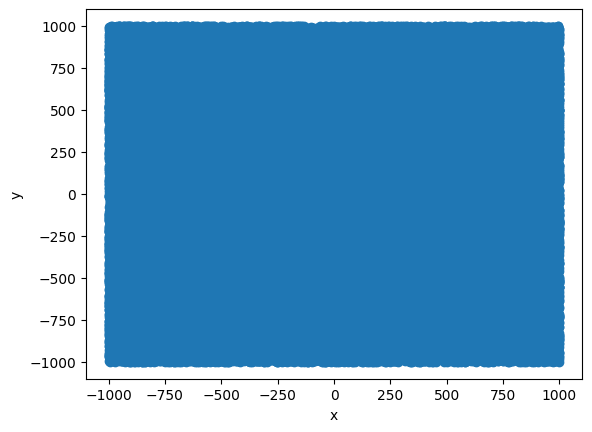

In [8]:
drawPoints(pointsA)

b) 10<sup>5</sup> punktów o współrzędnych z przedziału [-10<sup>14</sup>; 10<sup>14</sup>]

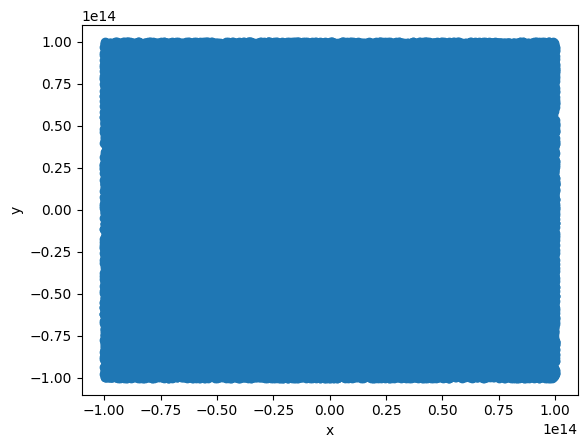

In [9]:
drawPoints(pointsB)

c) 1000 punktów na okręgu x<sup>2</sup> + y<sup>2</sup> = 100<sup>2</sup>

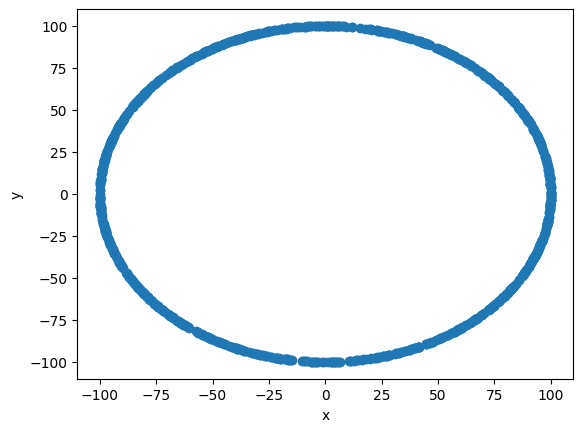

In [10]:
drawPoints(pointsC)

d) 1000 punktów o współrzędnych z przedziału [-1000; 1000] leżącej na prostej wyznaczonej przez wektor (a, b), gdzie a=(-1,0) i b=(1,0.1)

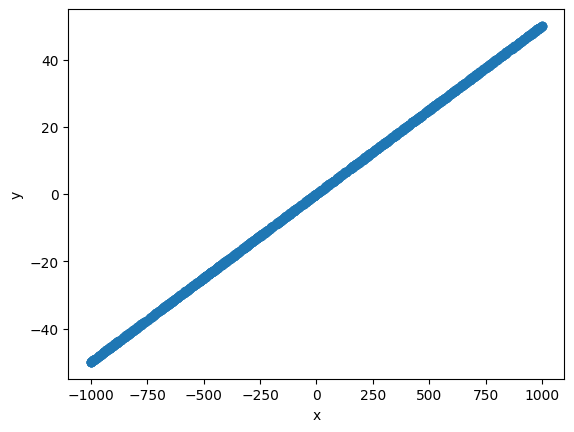

In [11]:
drawPoints(pointsD)

# 3. Podział punktów w zbiorze w zależności od położenia względem prostej

Przyjęta prosta jest wyznaczona przez wektor (a, b), gdzie a = (-1.0, 0.0) i b = (1.0, 0.1)

<h2>Funkcje do obliczania wyznaczników</h2>

In [12]:
# Determinant functions
def myDet3(a, b, c):
    return a[0] * b[1] + b[0] * c[1] + c[0] * a[1] - b[1] * c[0] - c[1] * a[0] - a[1] * b[0]

def myDet2(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

def libDet3(a, b, c):
    matrix = [
        [a[0], a[1], 1],
        [b[0], b[1], 1],
        [c[0], c[1], 1]
    ]
    return np.linalg.det(matrix)

def libDet2(a, b, c):
    matrix = [
        [a[0] - c[0], a[1] - c[1]],
        [b[0] - c[0], b[1] - c[1]]
    ]
    return np.linalg.det(matrix)

<h2>Funkcja dzieląca zbiór punktów na 3 podzbiory o różnych położeniach względem prostej</h2>

In [13]:
# Splits points into pointsAbove, pointsBelow, pointsOn
def splitPoints(points, a, b, detFunction, epsilon):
    above = []
    below = []
    on = []
    for point in points:
        det = detFunction(a, b, point)
        if det > epsilon:
            above.append(point)
        elif det < -epsilon:
            below.append(point)
        else:
            on.append(point)
    return (above, below, on)

<h2>Funkcje do wizualnego przedstawienia punktów względem prostej</h2>

In [14]:
# Draws a set of points in a given color
def drawPointsSet(canvas, points, color="blue"):
    canvas.add_point(points, color=color)

# Draws family of sets of points in different colors
def drawPointsFamily(canvas, pointsFamily, colors):
    for i in range(len(pointsFamily)):
        pointsSet = pointsFamily[i]
        if i < len(colors):
            drawPointsSet(canvas, pointsSet, colors[i])
        else:
            drawPointsSet(canvas, pointsSet)

# Draws a line
def drawLine(canvas, point1, point2, color="red"):
    canvas.add_line((point1, point2), color=color)

# Draws and shows points depending on their position relative to a line
def drawEverything(pointsFamily, pointsColors, linePoint1, linePoint2, lineColor):
    canvas = Visualizer()
    drawPointsFamily(canvas, pointsFamily, pointsColors)
    drawLine(canvas, linePoint1, linePoint2, lineColor)
    canvas.show()

<h2>Inicjacja wartości, na których będziemy pracować</h2>

Ustawiamy wartości punktów wyznaczających prostą, kolor tej prostej oraz kolory podzbiorów punktów

In [15]:
linePoint1 = (-1.0,0.0)
linePoint2 = (1.0,0.1)
lineColor = "red"
pointsColors = ["green", "orange", "purple"] # in order: above, below and on the line

Ustalone kolory to:</br>
- kolor prostej - czerwony</br>
- kolor punktów nad prostą (po lewej od prostej) - zielony
- kolor punktów pod prostą (po prawej od prostej) - pomarańczowy
- kolor punktów na prostej - fioletowy

Stwórzmy również tablice zbiorów punktów, epsilonów oraz tablicę funkcji liczenia wyznacznika

In [16]:
pointsSets = [pointsA, pointsB, pointsC, pointsD]
epsilons = [0, 10 ** -14, 10 ** -12, 10 ** -10, 10 ** -8]
detFunctions = [myDet3, myDet2, libDet3, libDet2]

Potrzebujemy również przechować dla każdego zbioru punktów informacje na temat ile punktów znalazło się w każdym z podzbiorów w zależności od użytego epsilonu, funkcji liczenia wyznacznika oraz precyzji liczby zmiennoprzecinkowej

In [17]:
# Enums for different arguments
class PointsSet(Enum):
    __order__ = "A B C D"
    A = 0
    B = 1
    C = 2
    D = 3

class Precision(Enum):
    __order__ = "FLOAT64 FLOAT32"
    FLOAT64 = 0
    FLOAT32 = 1

class Epsilon(Enum):
    __order__ = "ZERO E14 E12 E10 E8"
    ZERO = 0
    E14 = 1
    E12 = 2
    E10 = 3
    E8 = 4

class DetFunction(Enum):
    __order__ = "MY3 MY2 LIB3 LIB2"
    MY3 = 0
    MY2 = 1
    LIB3 = 2
    LIB2 = 3

# Result class to handle setting and getting result
class Result:
    def __init__(self):
        self.data = [[[[None for _ in range(4)] for _ in range(5)] for _ in range(2)] for _ in range(4)]
    
    def getData(self, pointsSet, precision, epsilon, detFunction):
        return self.data[pointsSet.value][precision.value][epsilon.value][detFunction.value]

    def setData(self, pointsSet, precision, epsilon, detFunction, data):
        self.data[pointsSet.value][precision.value][epsilon.value][detFunction.value] = data

results = Result()

Implementacja za pomocą enumów i klasy pomoże w czytelności kodu podczas przypisywania i pobierania danych

Na koniec dodajmy jeszcze funkcję, która będzie dzielić i rysować zbiory oraz zapisywać zebrany z nich rezultaty

In [18]:
# All needed operations combined into one for convenience
def splitSetDraw(pointsSet, precision, epsilon, detFunction):
    ptSet = pointsSets[pointsSet.value]
    detFunc = detFunctions[detFunction.value]
    eps = epsilons[epsilon.value]
    if precision == Precision.FLOAT32:
        ptSet = np.float32(ptSet)
    pointsFamily = splitPoints(ptSet, linePoint1, linePoint2, detFunc, eps)
    results.setData(pointsSet, precision, epsilon, detFunction, [len(pSet) for pSet in pointsFamily])
    drawEverything(pointsFamily, pointsColors, linePoint1, linePoint2, lineColor)

# 3.1 Graficzne przedstawienie wyników

<h2>3.1.1 Zbiór A</h2>

Przedstawmy wyniki dla zbioru A

<h3>Epsilon = 0</h3>

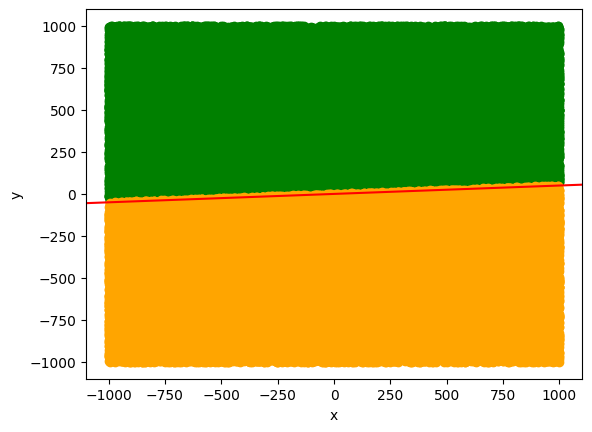

In [19]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.ZERO, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

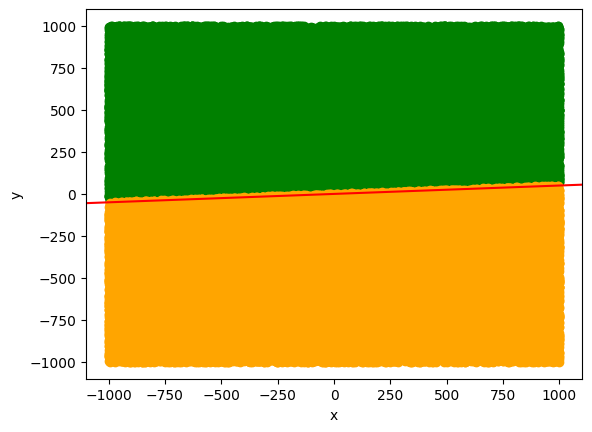

In [20]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.ZERO, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

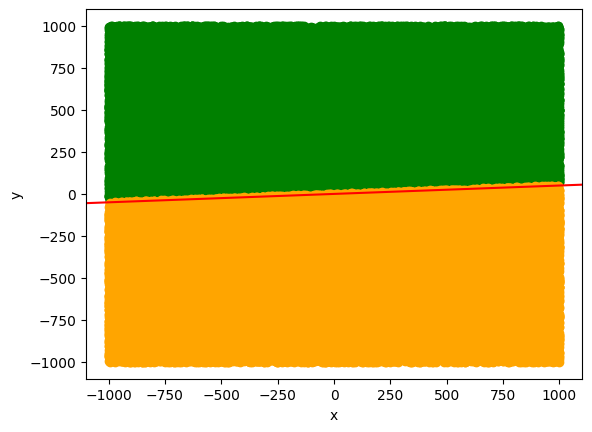

In [21]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.ZERO, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

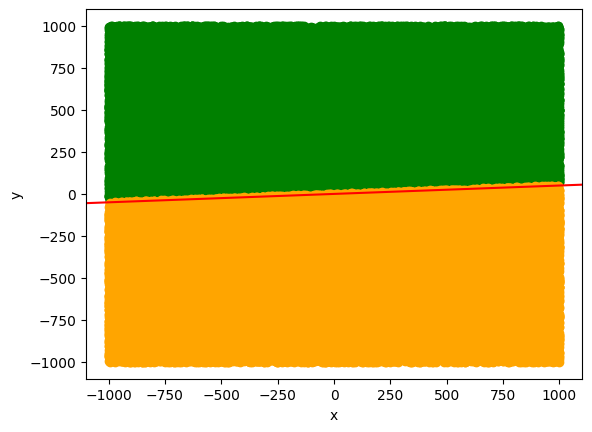

In [22]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.ZERO, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

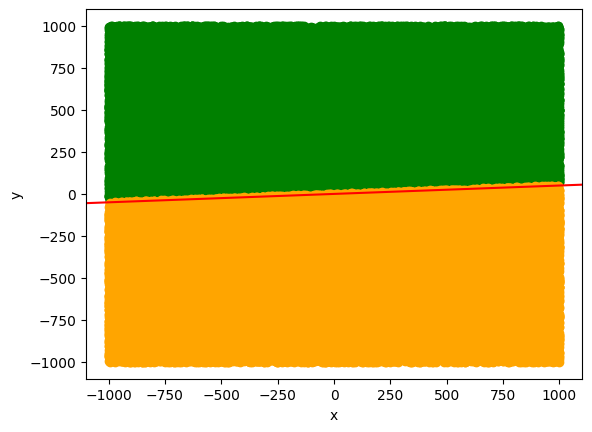

In [23]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.ZERO, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

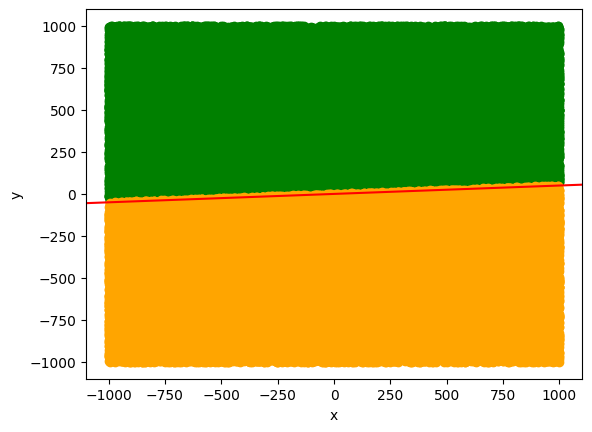

In [24]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.ZERO, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

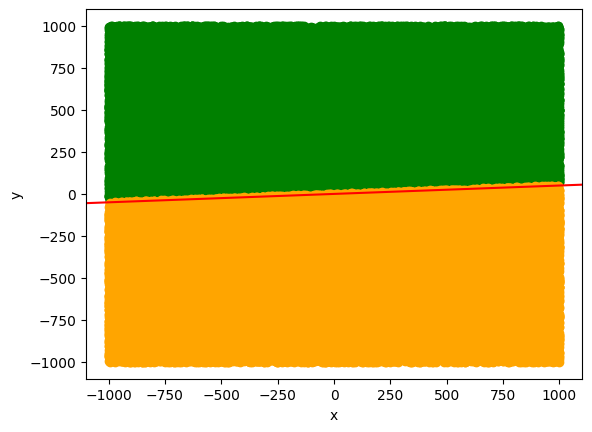

In [25]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.ZERO, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

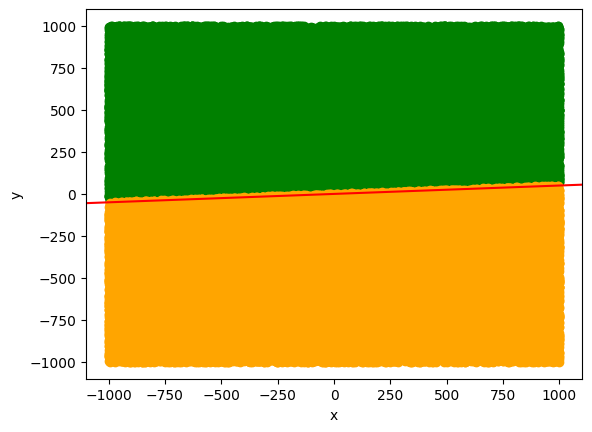

In [26]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.ZERO, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-14</sup></h3>

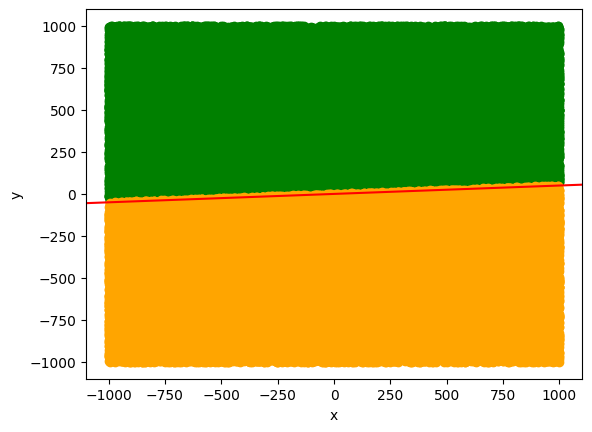

In [27]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E14, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

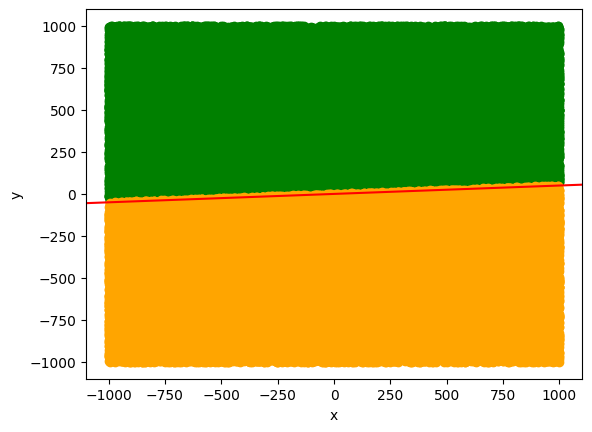

In [28]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E14, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

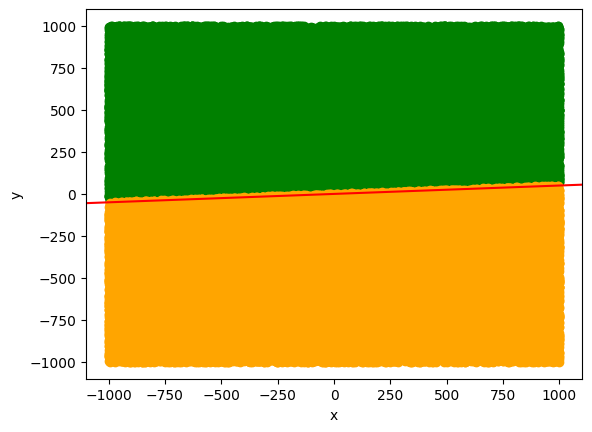

In [29]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E14, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

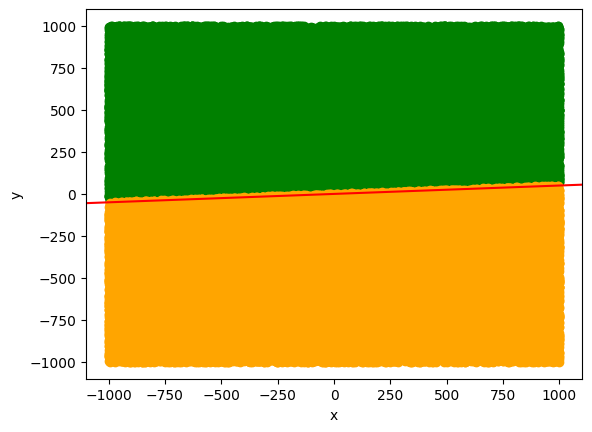

In [30]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E14, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

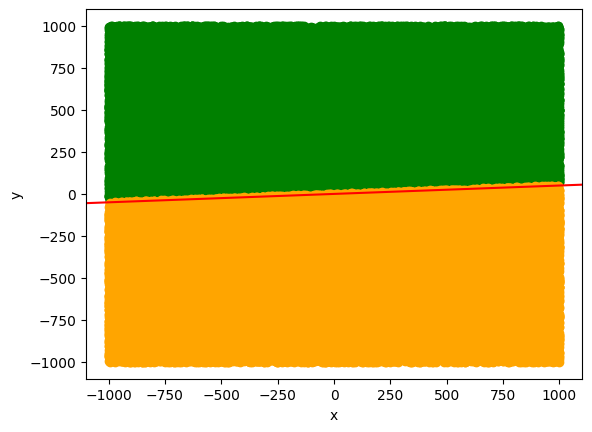

In [31]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E14, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

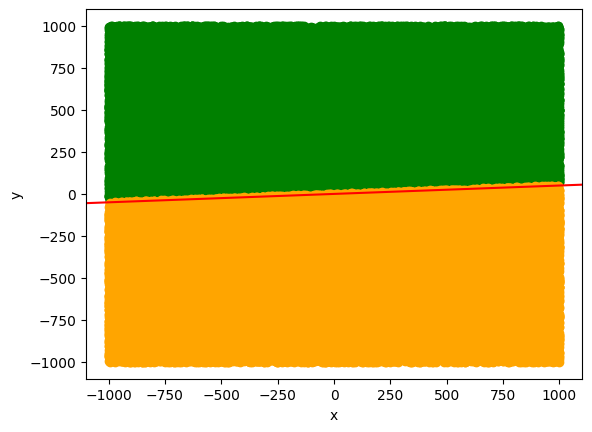

In [32]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E14, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

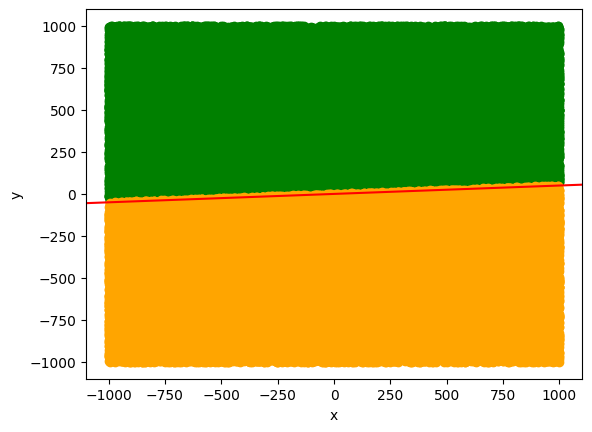

In [33]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E14, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

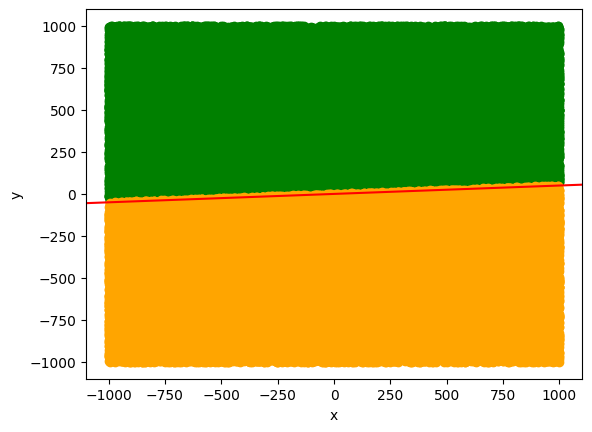

In [34]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E14, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-12</sup></h3>

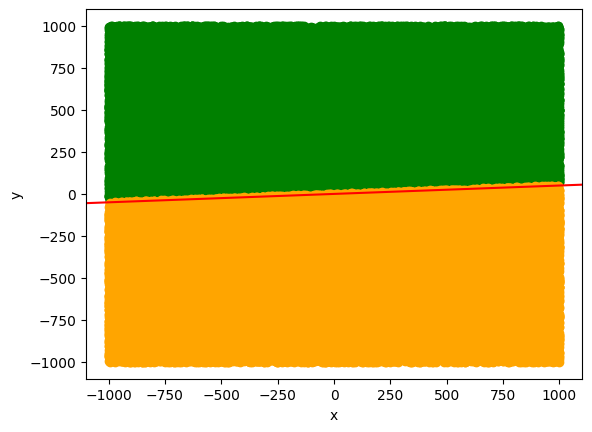

In [35]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E12, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

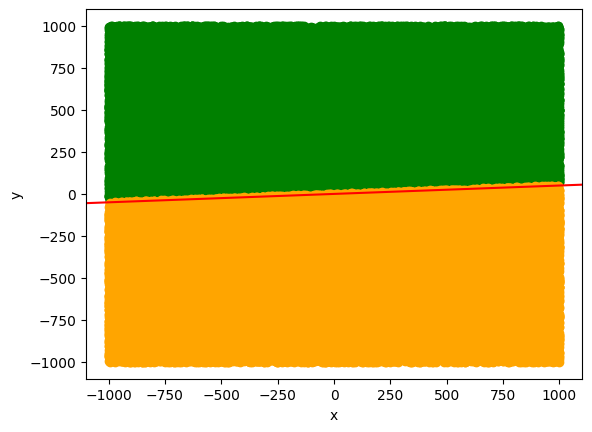

In [36]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E12, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

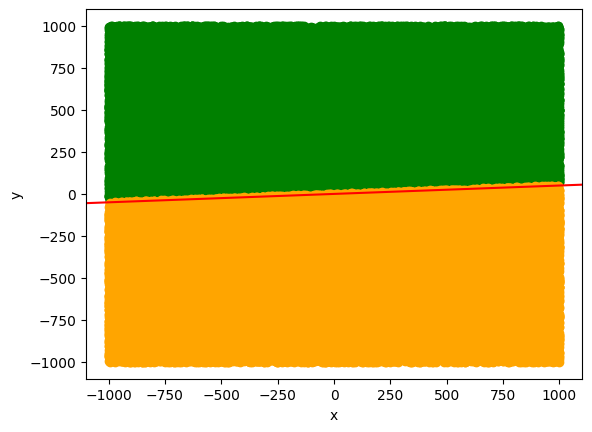

In [37]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E12, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

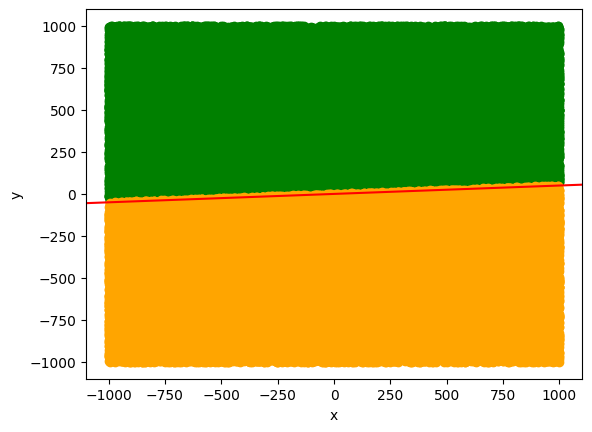

In [38]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E12, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

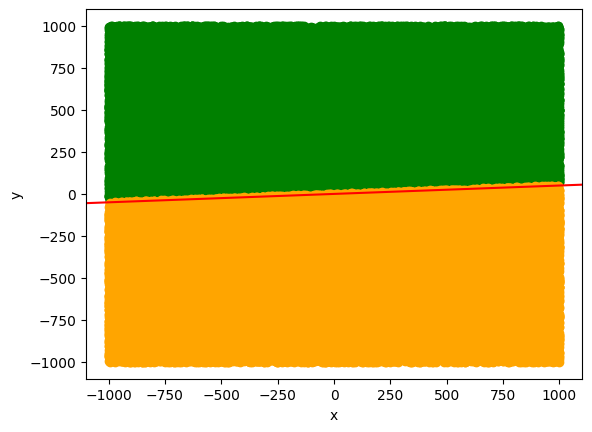

In [39]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E12, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

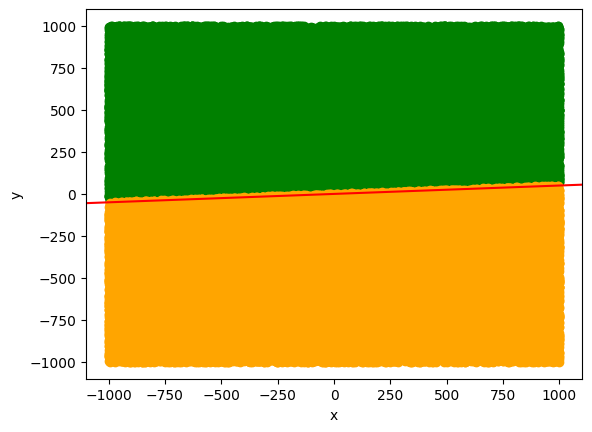

In [40]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E12, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

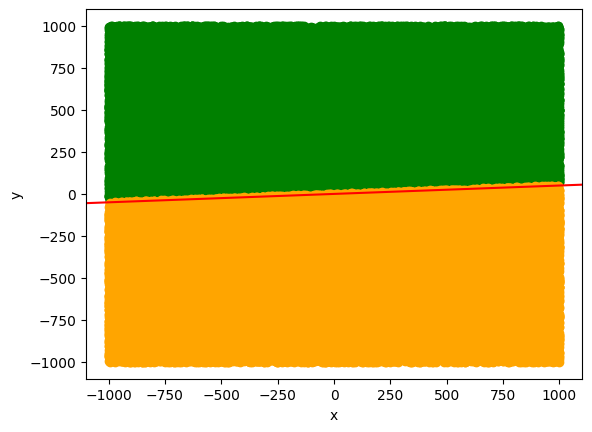

In [41]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E12, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

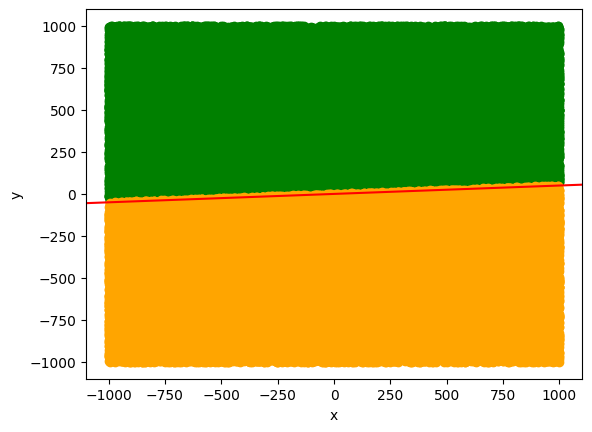

In [42]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E12, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-10</sup></h3>

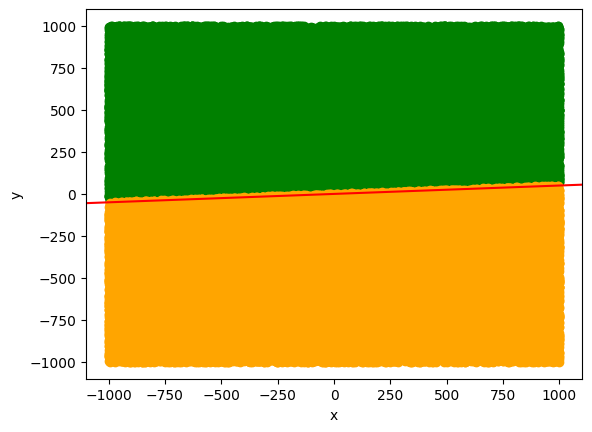

In [43]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E10, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

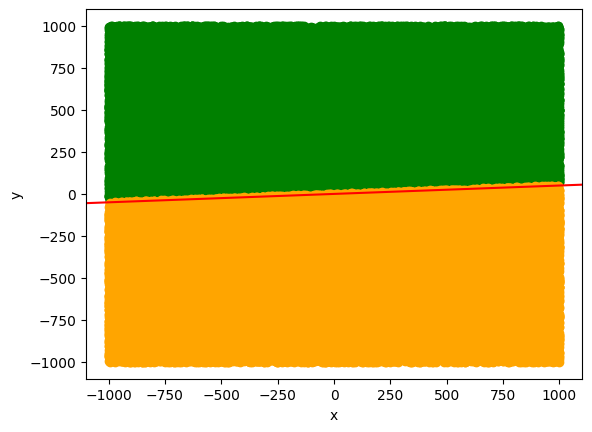

In [44]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E10, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

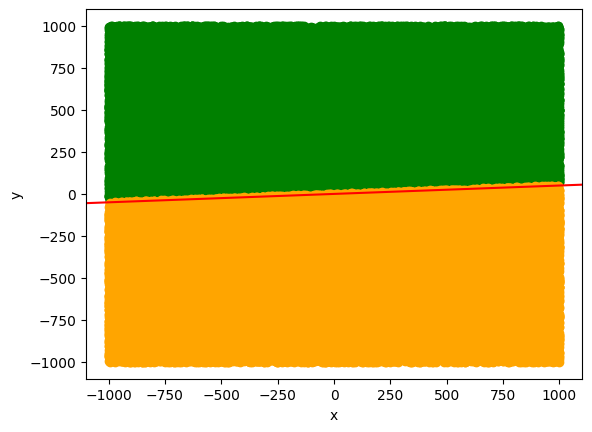

In [45]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E10, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

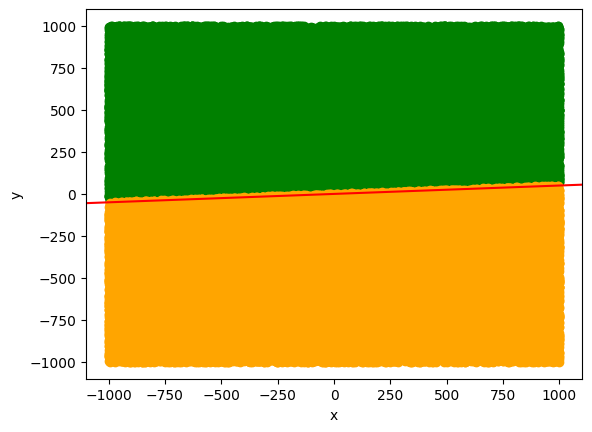

In [46]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E10, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

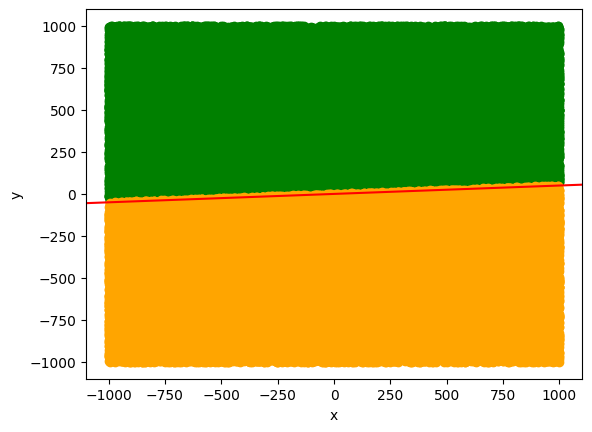

In [47]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E10, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

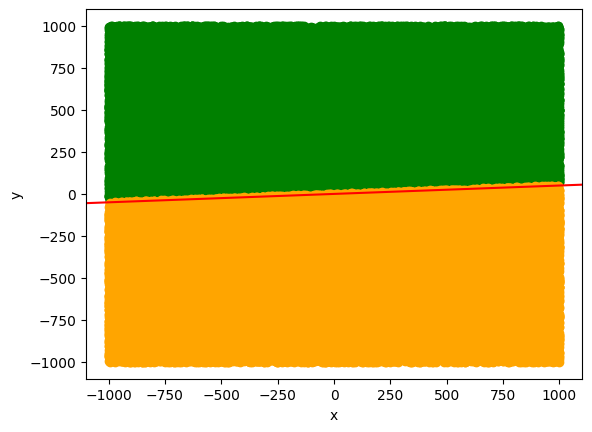

In [48]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E10, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

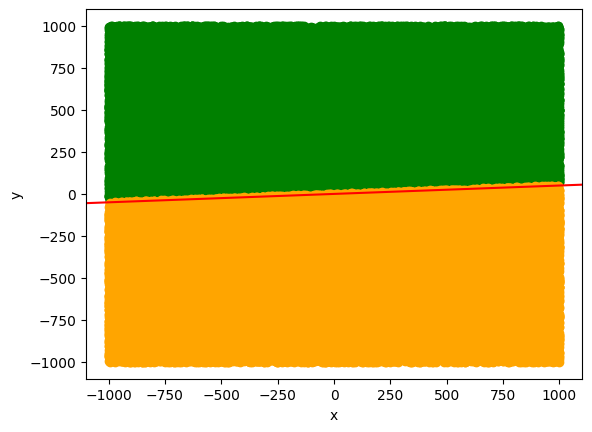

In [49]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E10, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

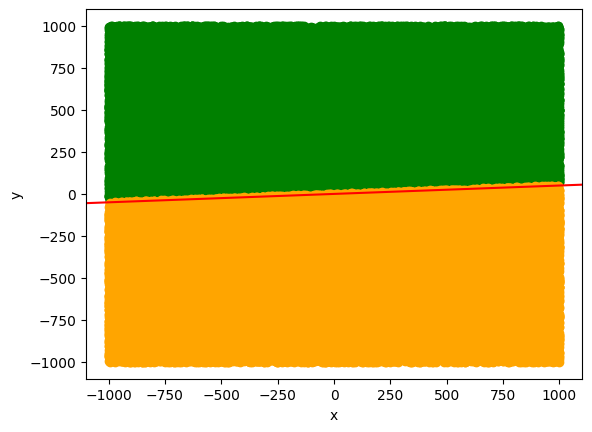

In [50]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E10, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-8</sup></h3>

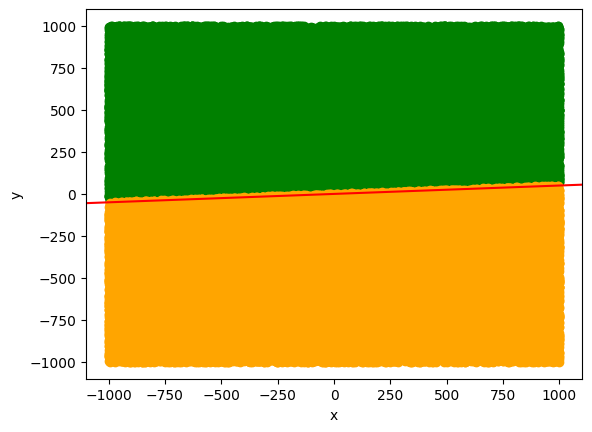

In [51]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E8, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

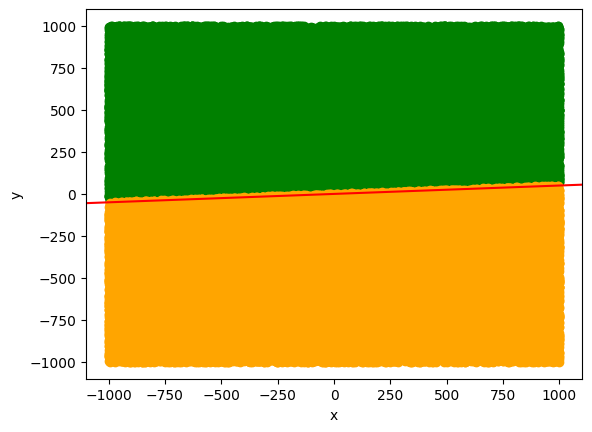

In [52]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E8, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

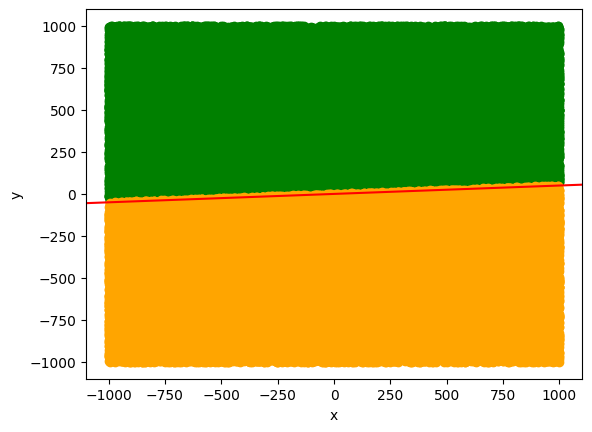

In [53]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E8, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

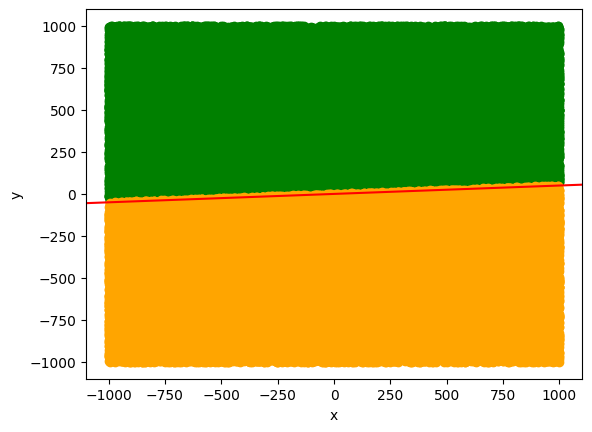

In [54]:
splitSetDraw(PointsSet.A, Precision.FLOAT64, Epsilon.E8, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

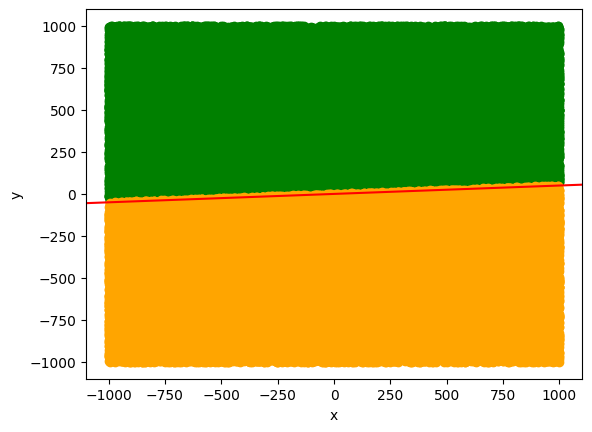

In [55]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E8, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

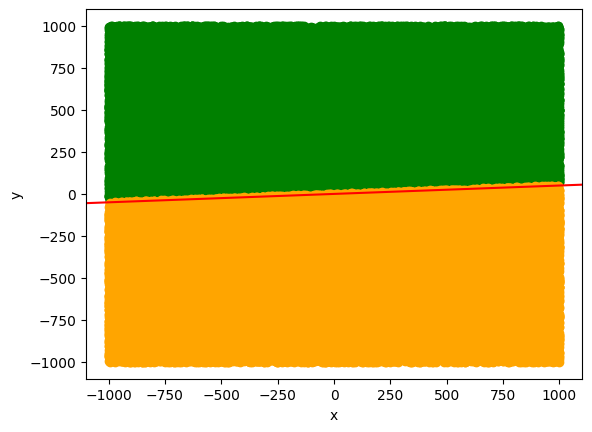

In [56]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E8, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

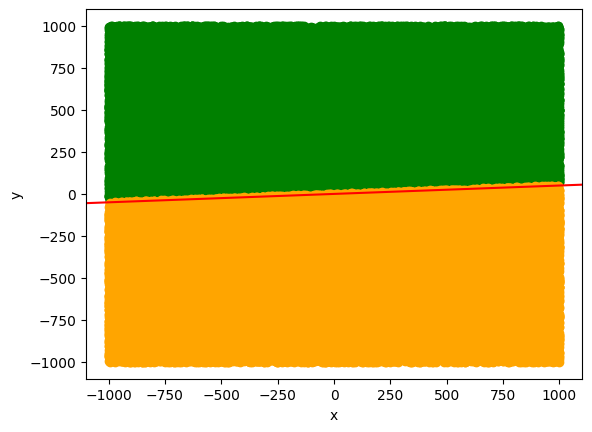

In [57]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E8, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

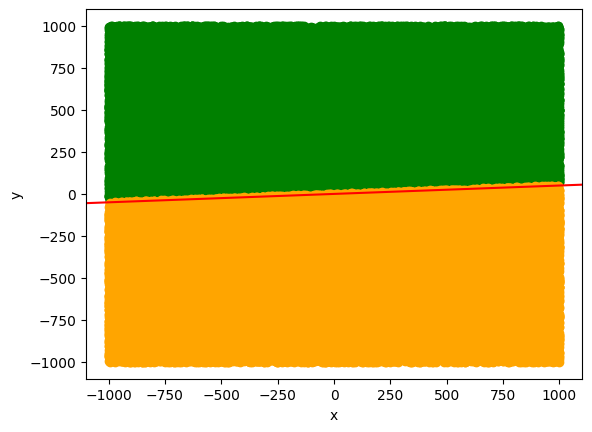

In [58]:
splitSetDraw(PointsSet.A, Precision.FLOAT32, Epsilon.E8, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h2>3.1.2 Zbiór B</h2>

Przedstawmy wyniki dla zbioru B

<h3>Epsilon = 0</h3>

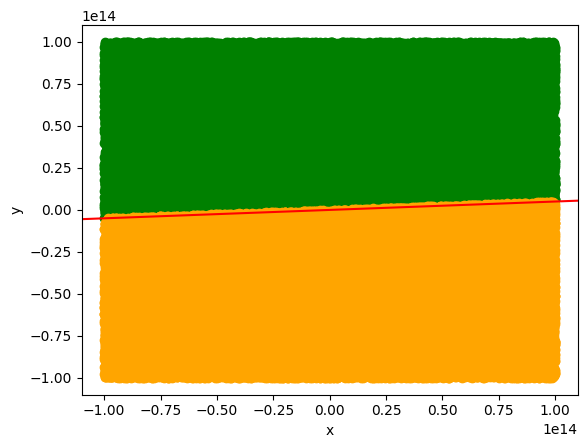

In [59]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.ZERO, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

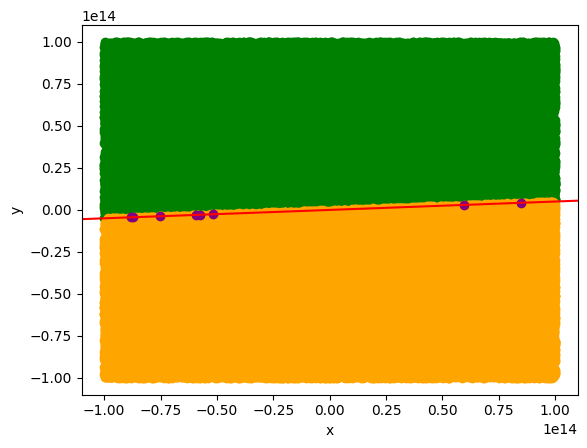

In [60]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.ZERO, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

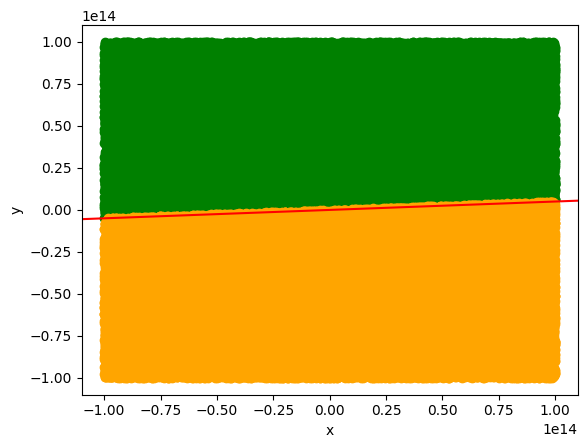

In [61]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.ZERO, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

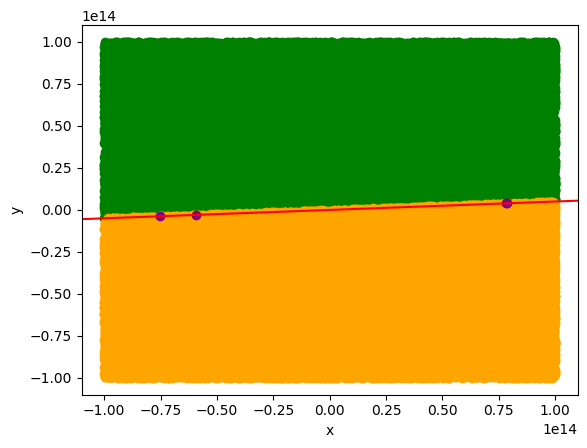

In [62]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.ZERO, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

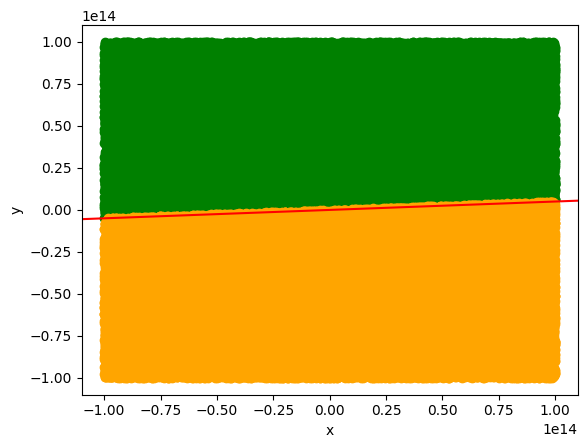

In [63]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.ZERO, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

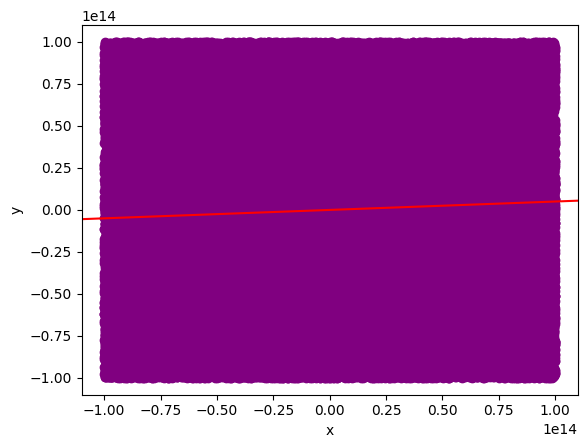

In [64]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.ZERO, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

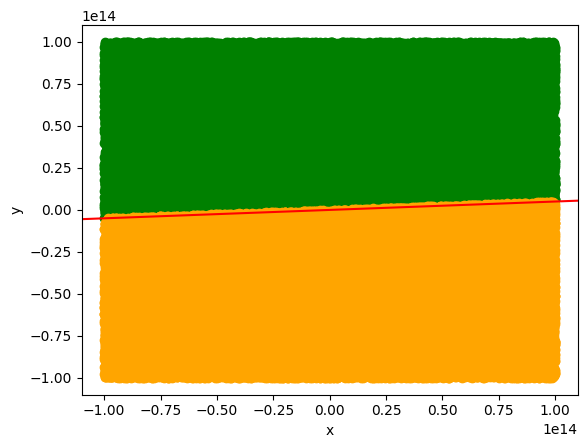

In [65]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.ZERO, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

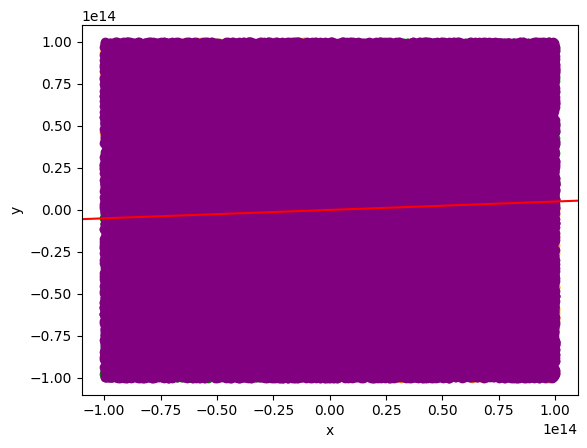

In [66]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.ZERO, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-14</sup></h3>

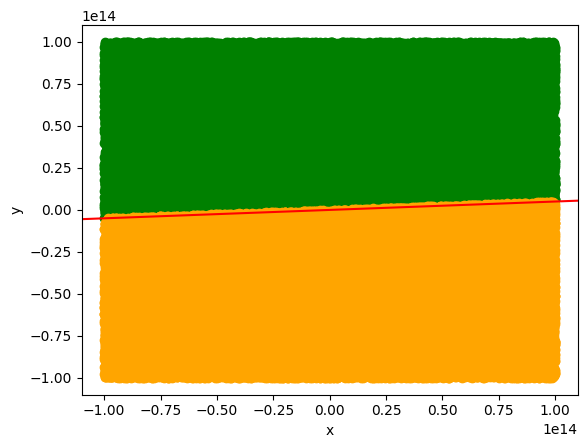

In [67]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E14, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

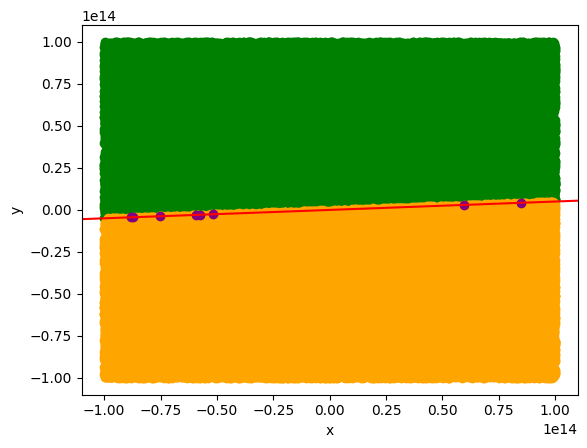

In [68]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E14, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

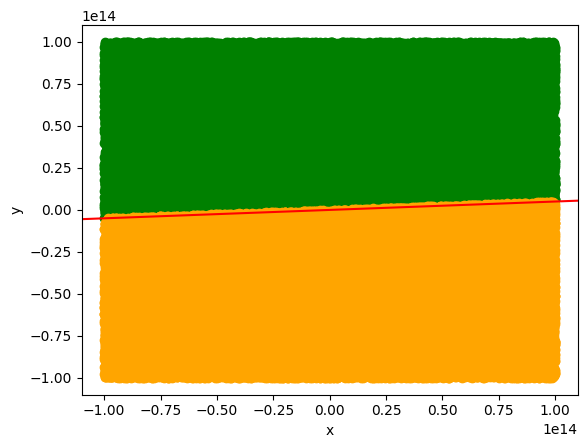

In [69]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E14, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

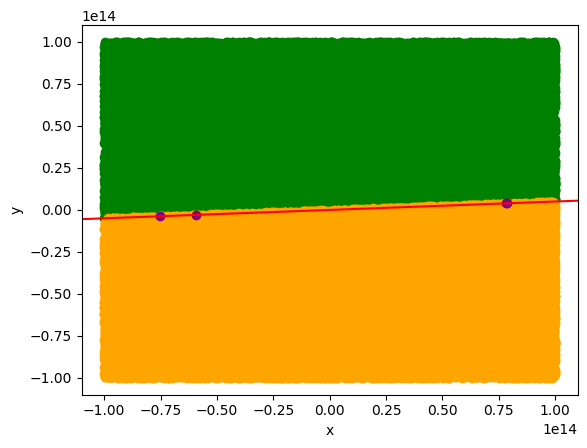

In [70]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E14, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

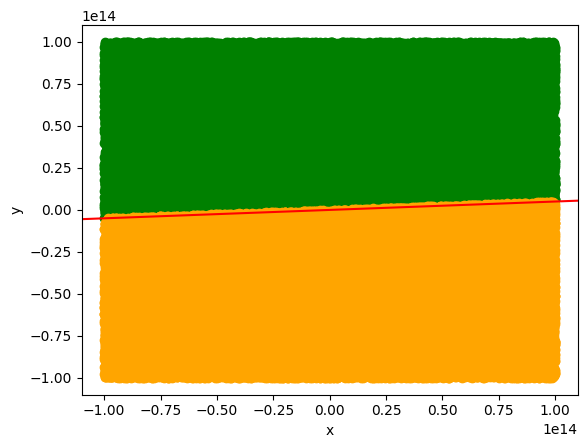

In [71]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E14, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

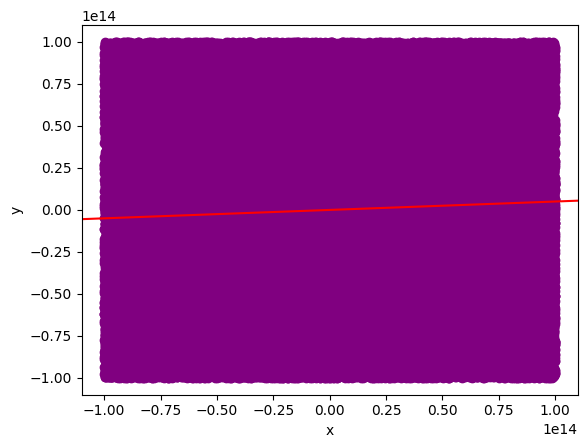

In [72]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E14, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

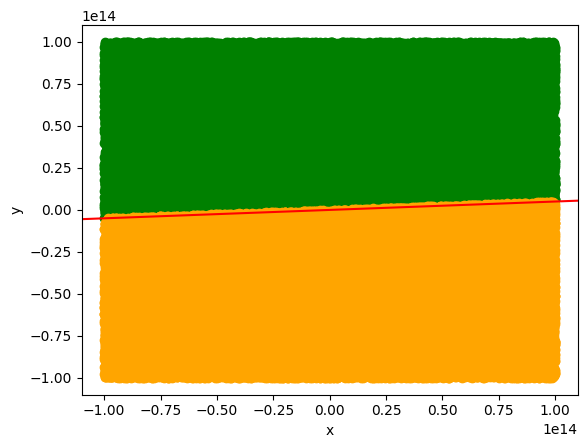

In [73]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E14, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

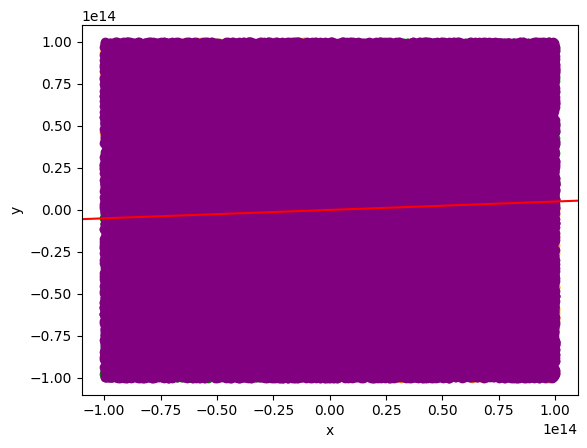

In [74]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E14, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-12</sup></h3>

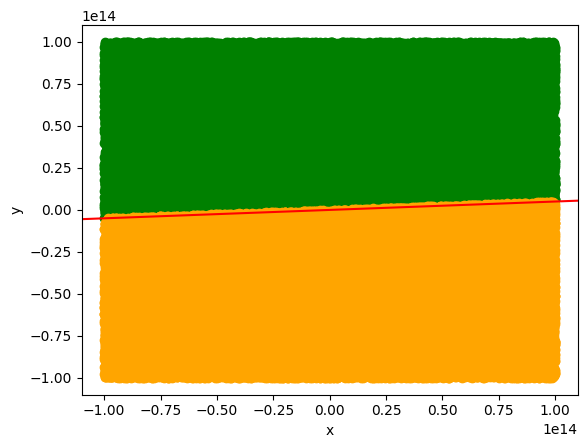

In [75]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E12, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

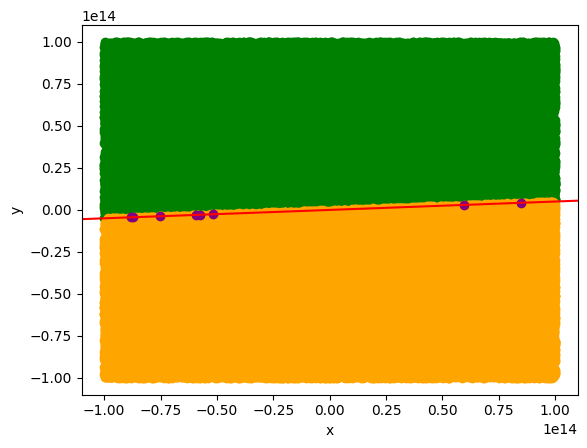

In [76]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E12, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

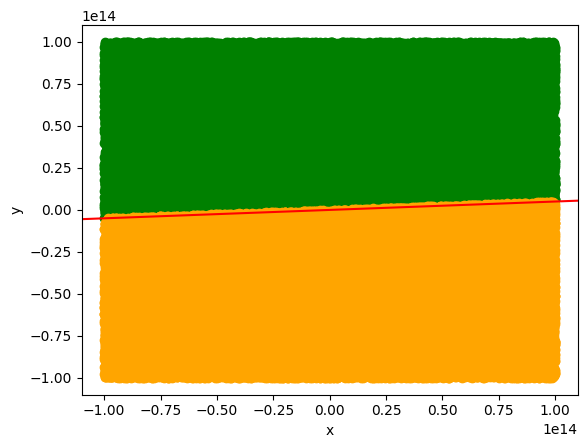

In [77]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E12, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

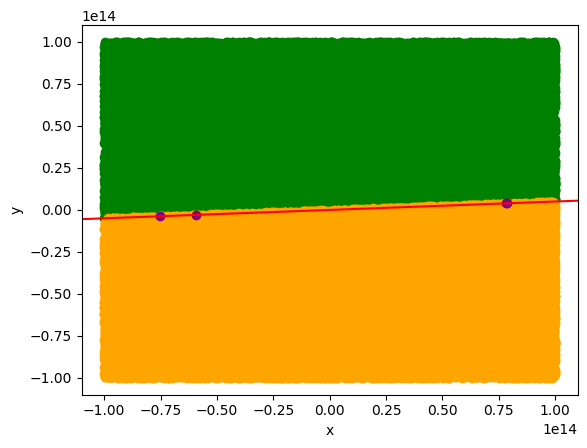

In [78]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E12, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

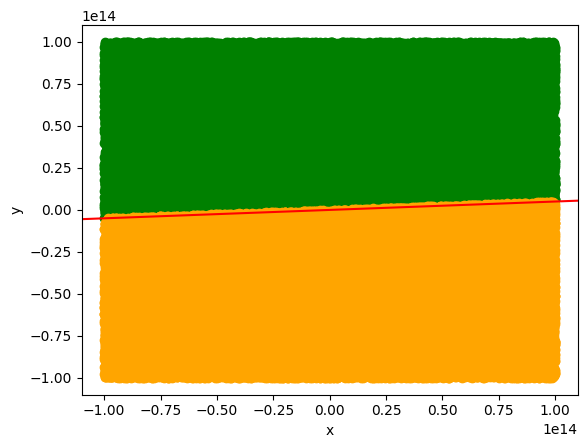

In [79]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E12, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

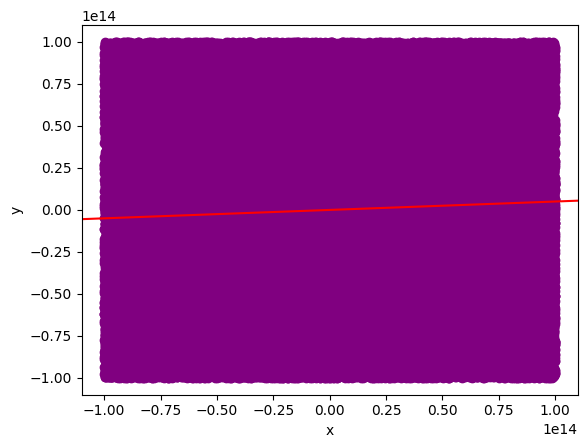

In [80]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E12, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

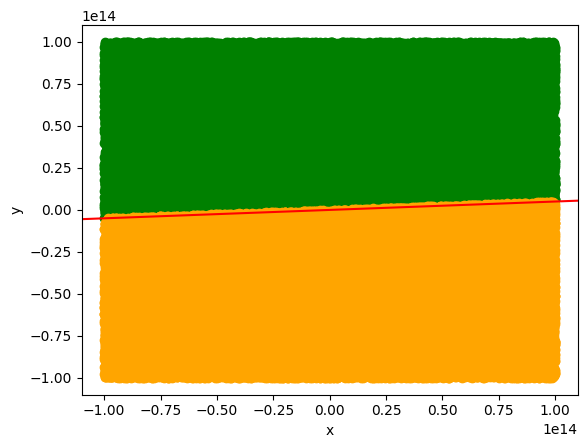

In [81]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E12, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

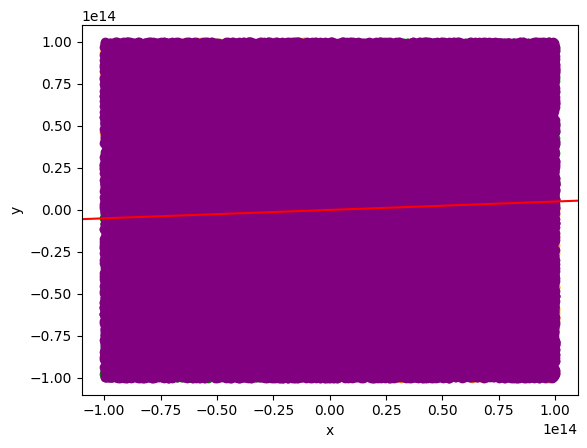

In [82]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E12, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-10</sup></h3>

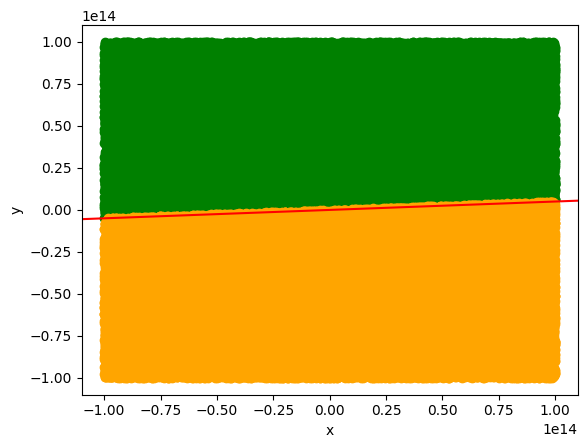

In [83]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E10, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

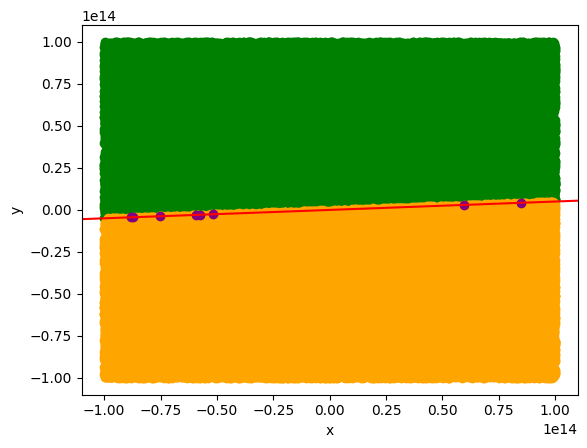

In [84]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E10, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

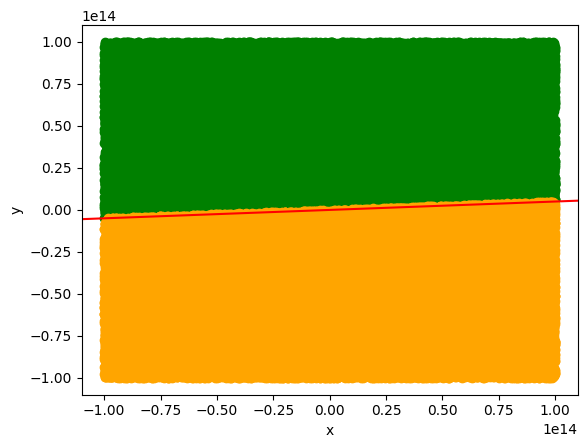

In [85]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E10, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

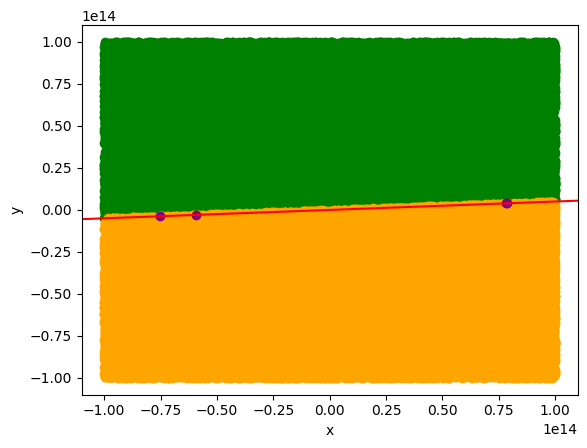

In [86]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E10, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

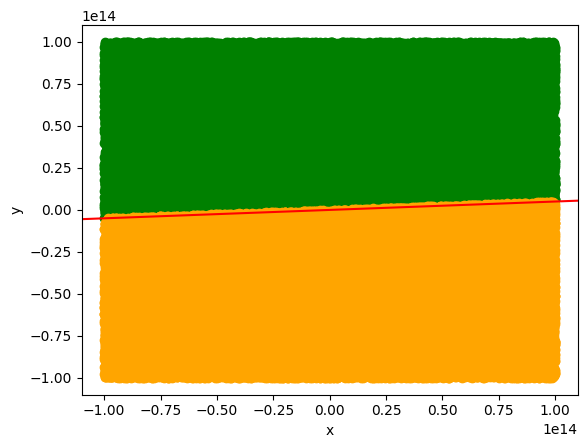

In [87]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E10, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

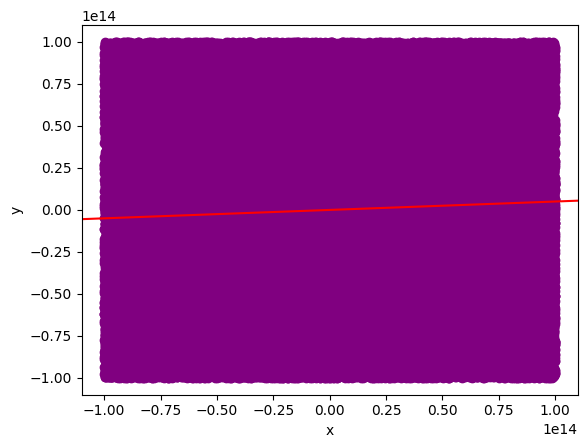

In [88]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E10, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

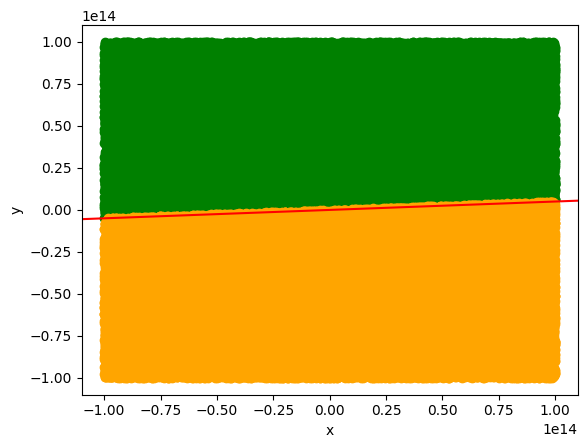

In [89]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E10, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

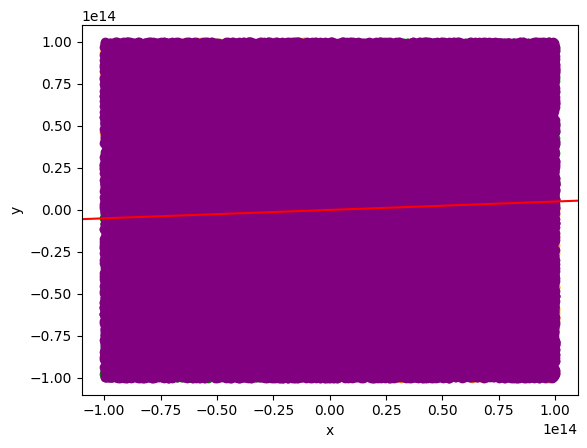

In [90]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E10, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-8</sup></h3>

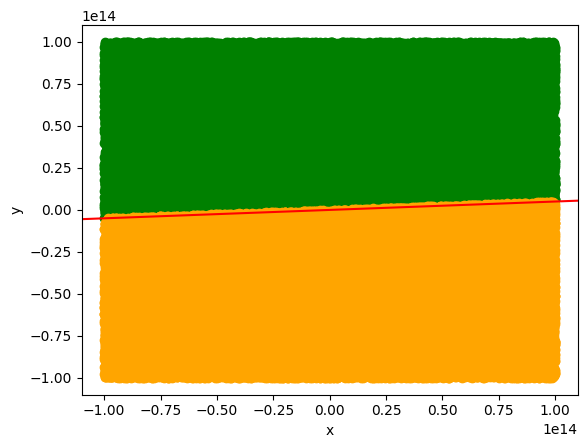

In [91]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E8, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

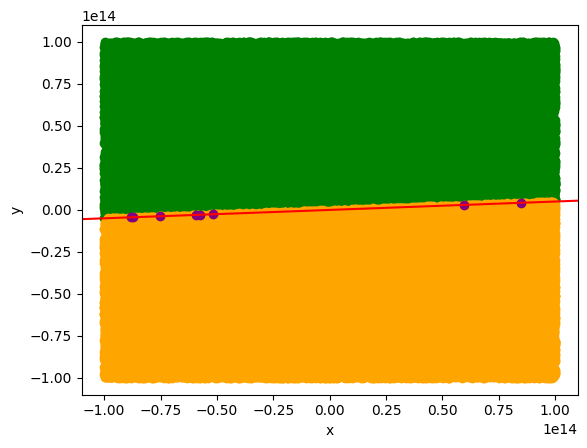

In [92]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E8, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

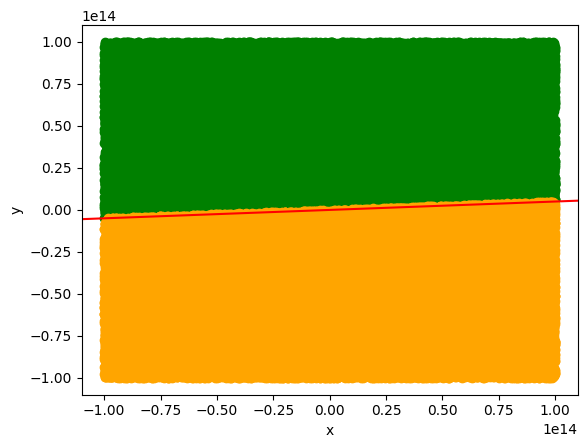

In [93]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E8, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

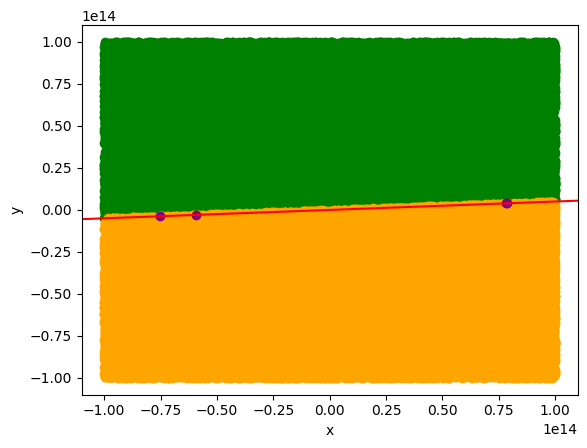

In [94]:
splitSetDraw(PointsSet.B, Precision.FLOAT64, Epsilon.E8, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

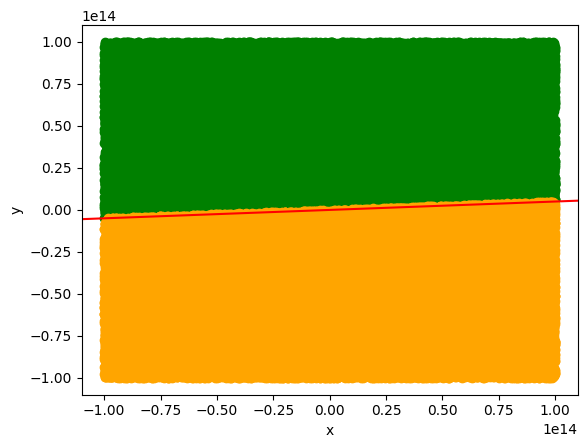

In [95]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E8, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

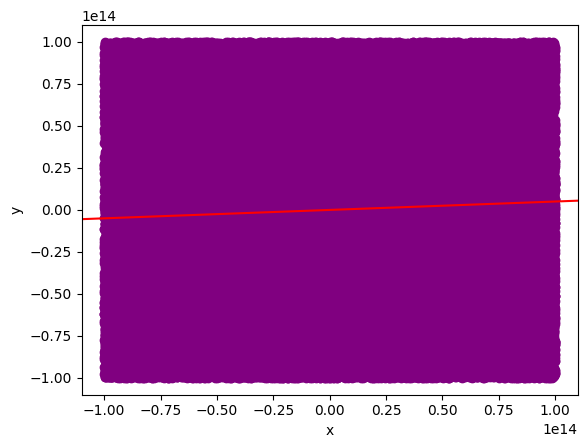

In [96]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E8, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

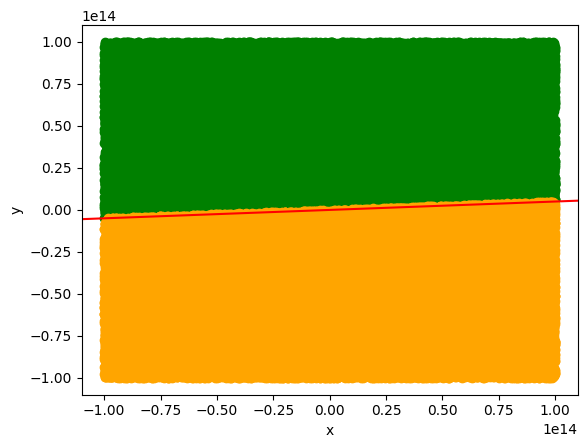

In [97]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E8, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

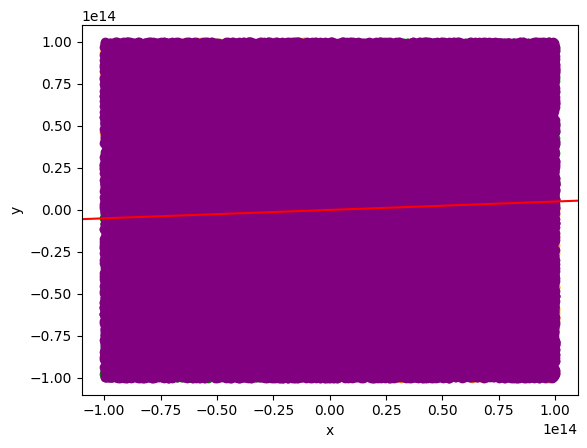

In [98]:
splitSetDraw(PointsSet.B, Precision.FLOAT32, Epsilon.E8, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h2>3.1.3 Zbiór C</h2>

Przedstawmy wyniki dla zbioru C

<h3>Epsilon = 0</h3>

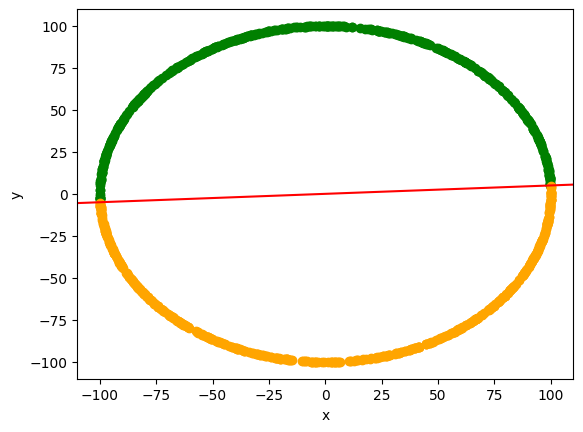

In [99]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.ZERO, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

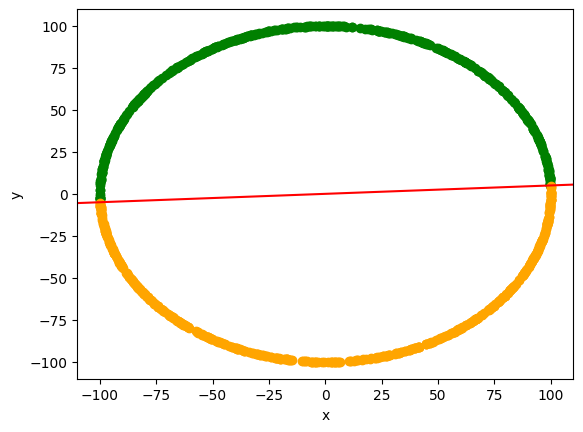

In [100]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.ZERO, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

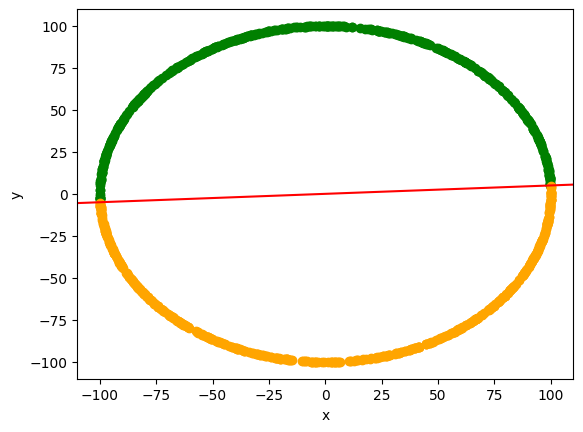

In [101]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.ZERO, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

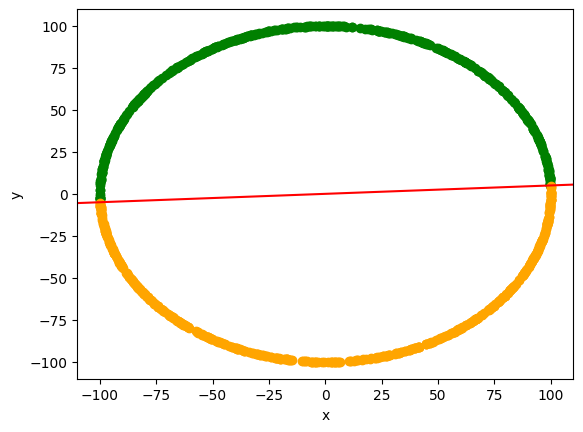

In [102]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.ZERO, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

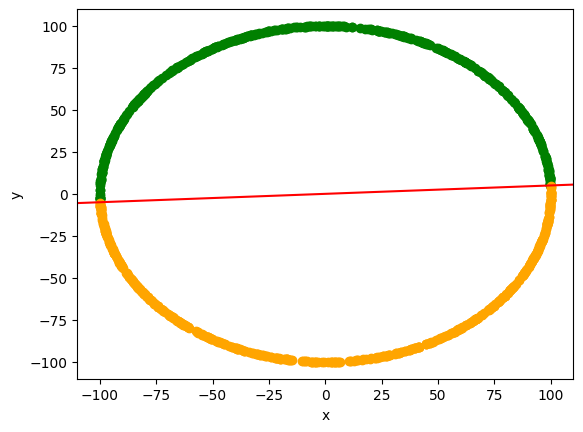

In [103]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.ZERO, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

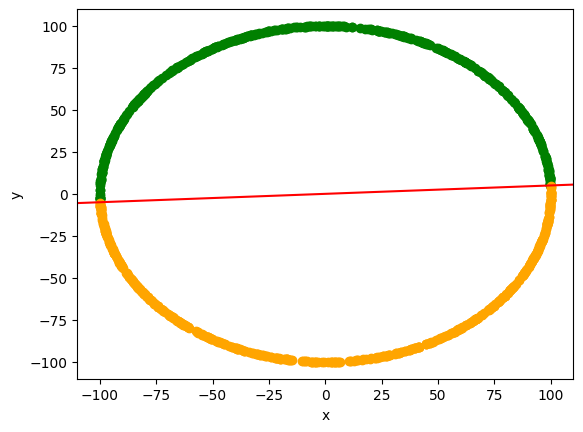

In [104]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.ZERO, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

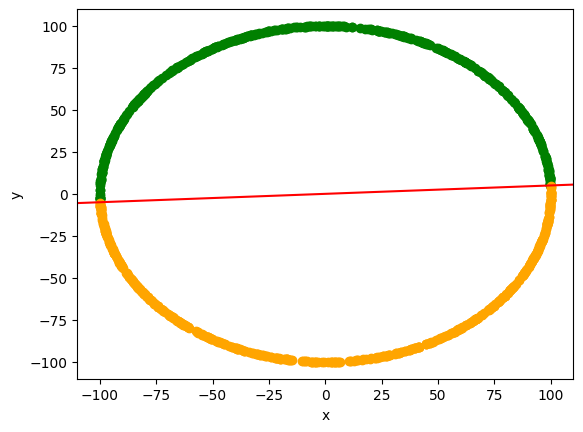

In [105]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.ZERO, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

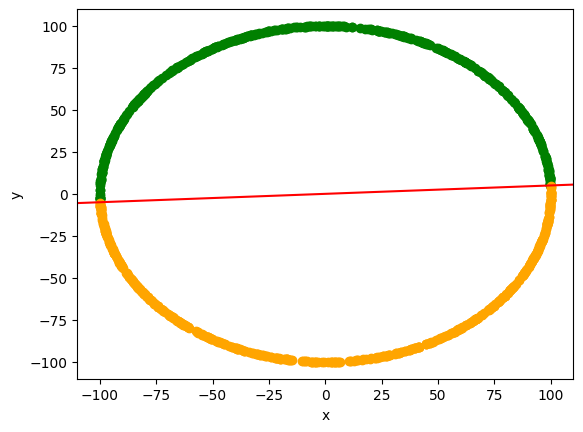

In [106]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.ZERO, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-14</sup></h3>

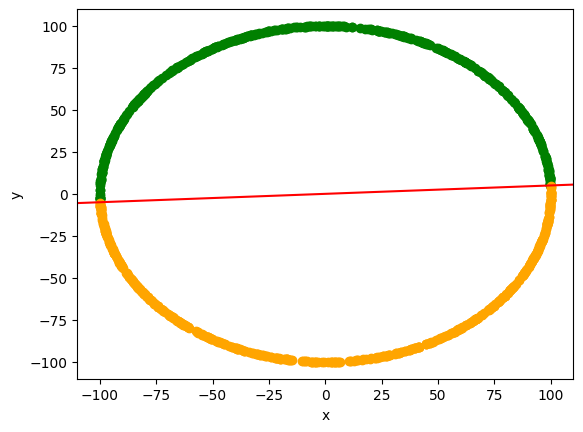

In [107]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E14, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

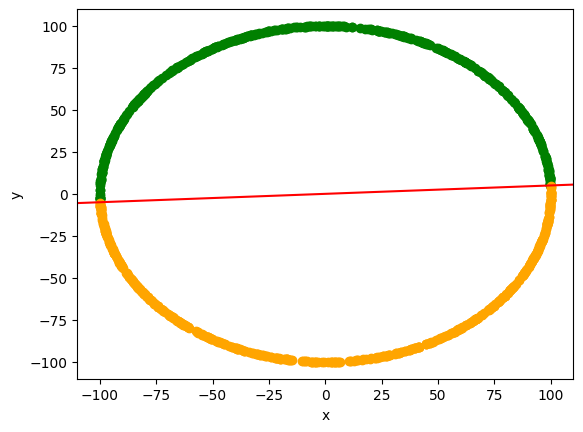

In [108]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E14, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

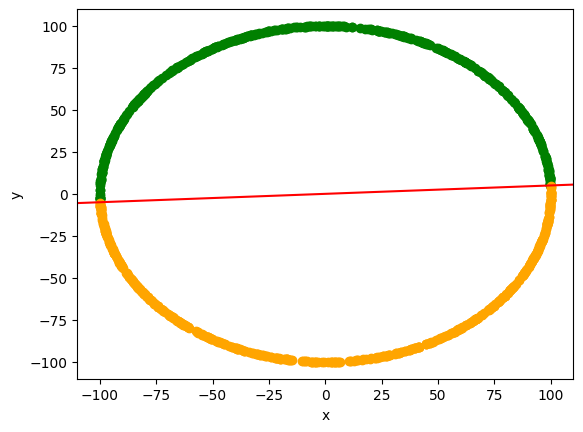

In [109]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E14, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

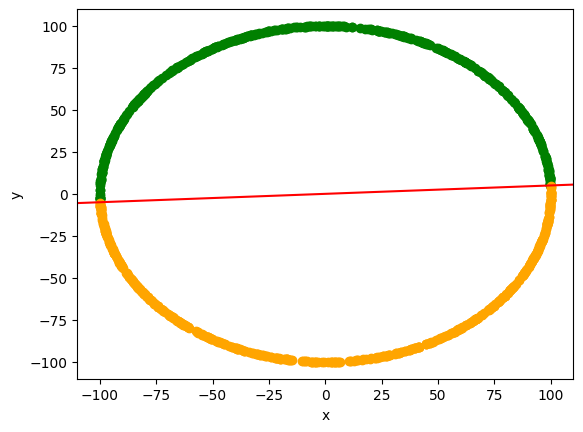

In [110]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E14, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

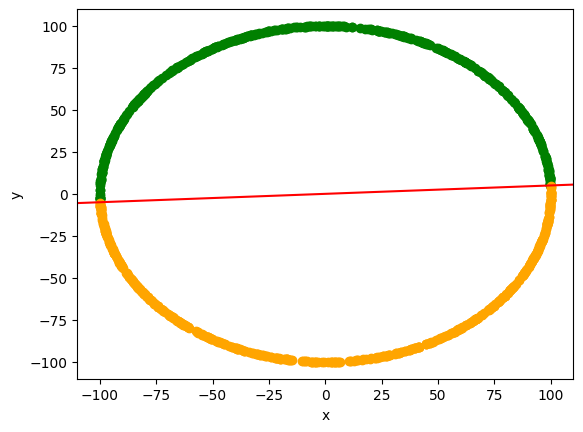

In [111]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E14, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

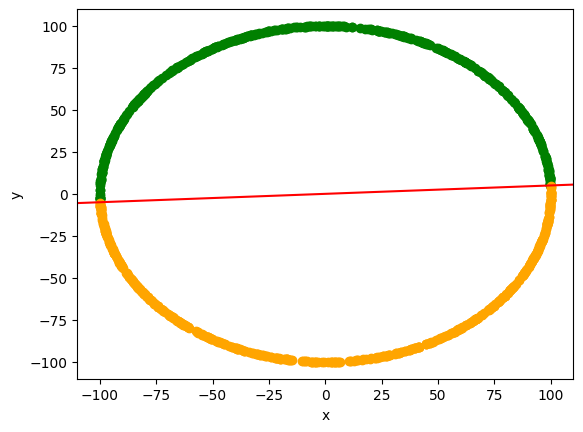

In [112]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E14, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

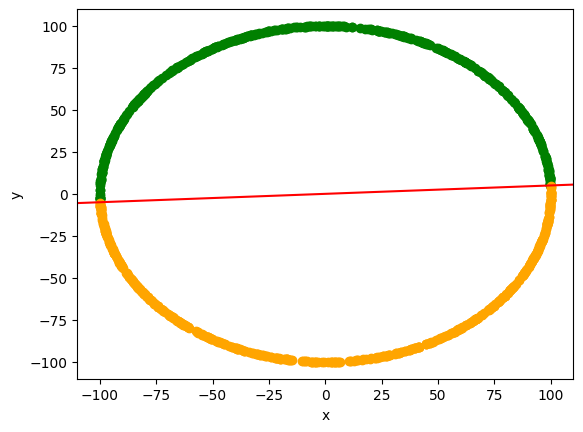

In [113]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E14, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

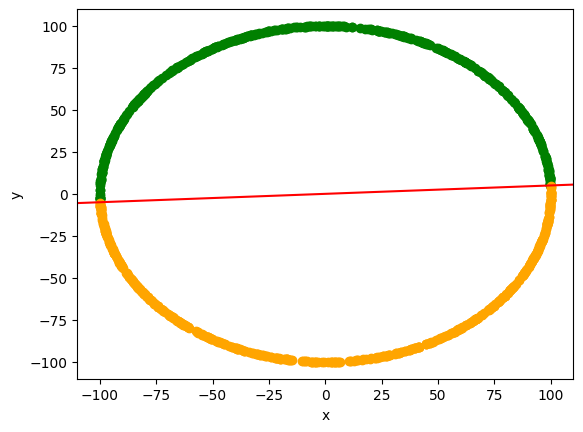

In [114]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E14, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-12</sup></h3>

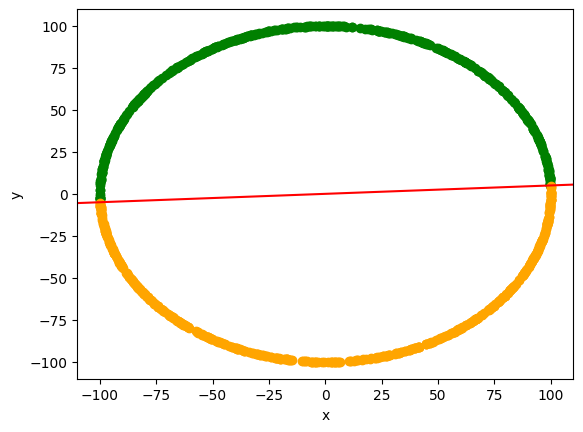

In [115]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E12, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

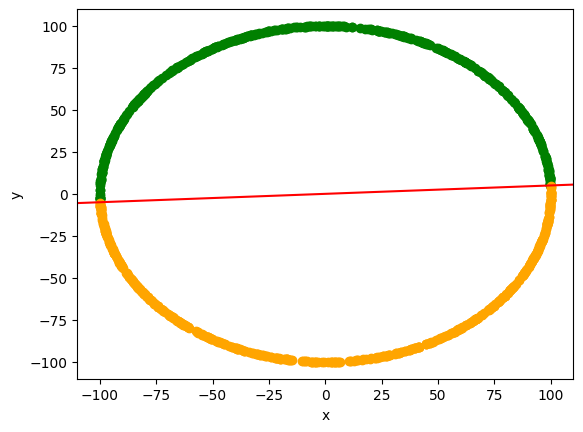

In [116]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E12, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

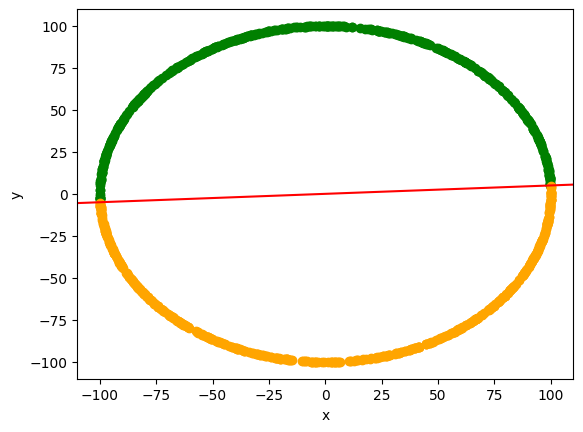

In [117]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E12, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

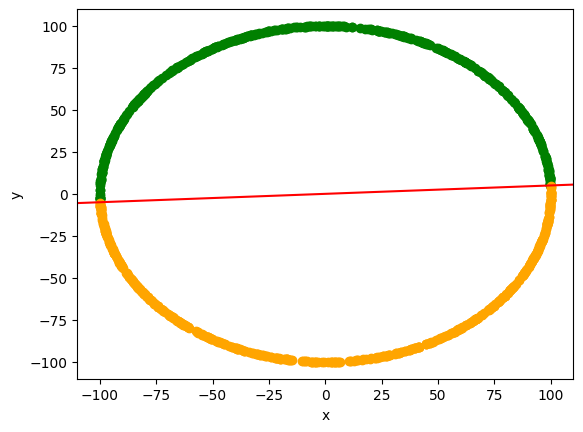

In [118]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E12, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

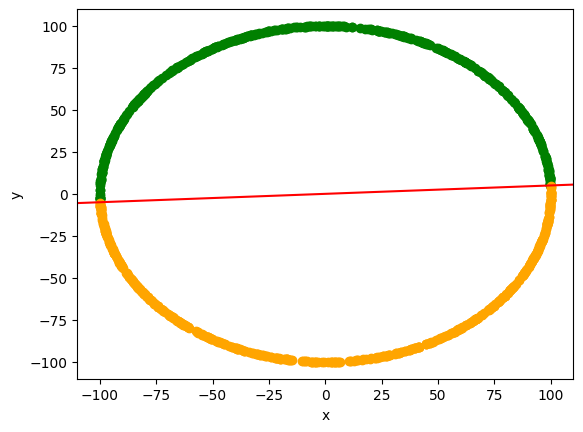

In [119]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E12, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

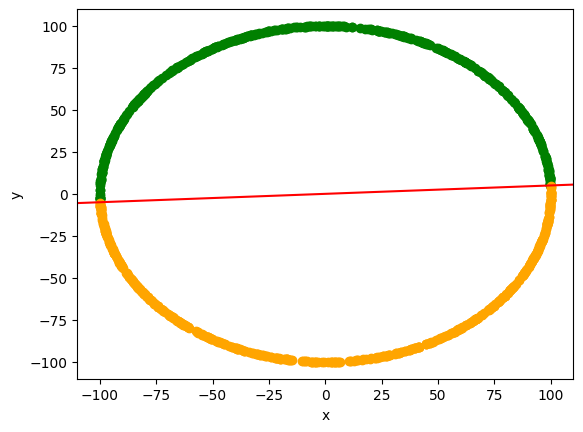

In [120]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E12, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

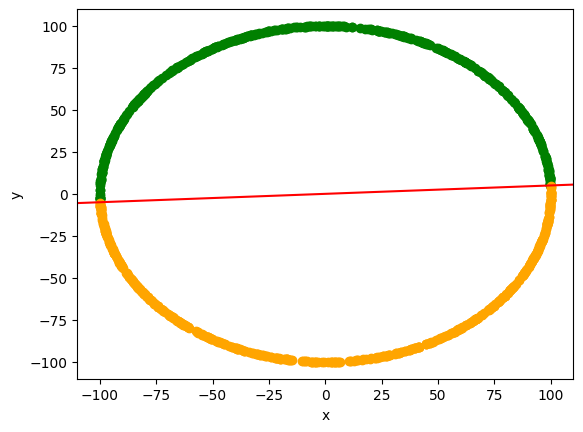

In [121]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E12, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

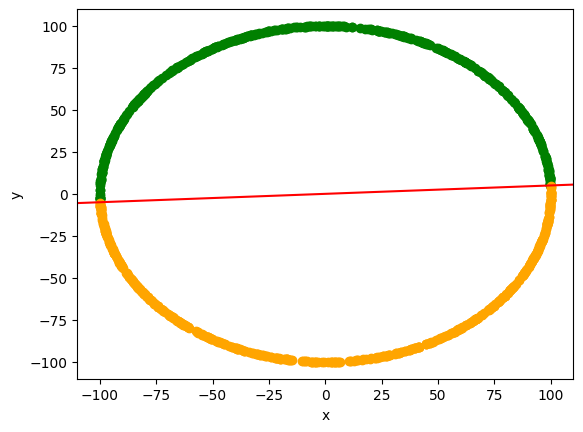

In [122]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E12, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-10</sup></h3>

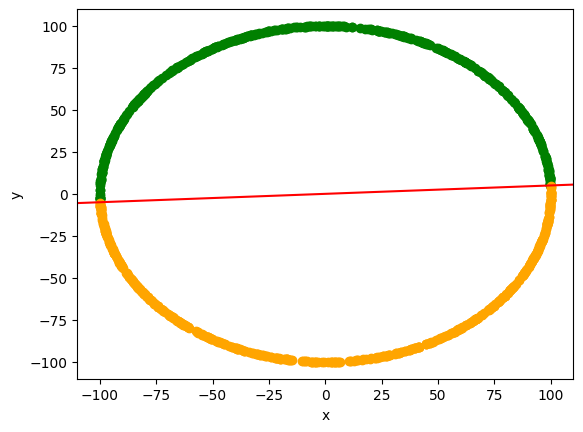

In [123]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E10, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

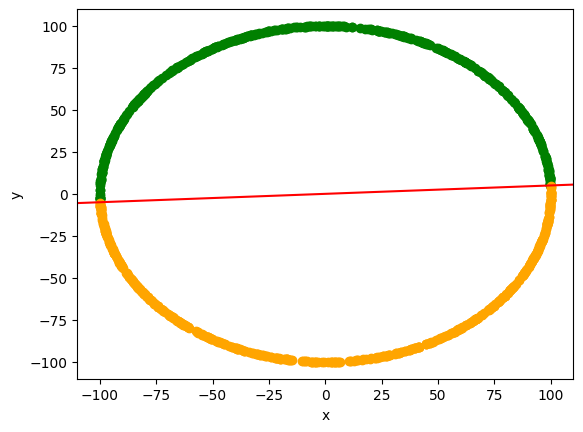

In [124]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E10, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

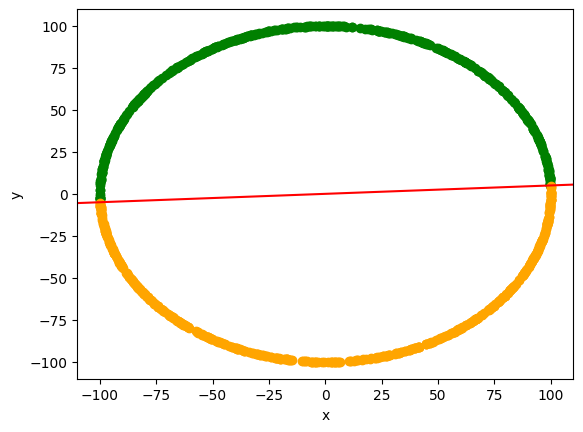

In [125]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E10, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

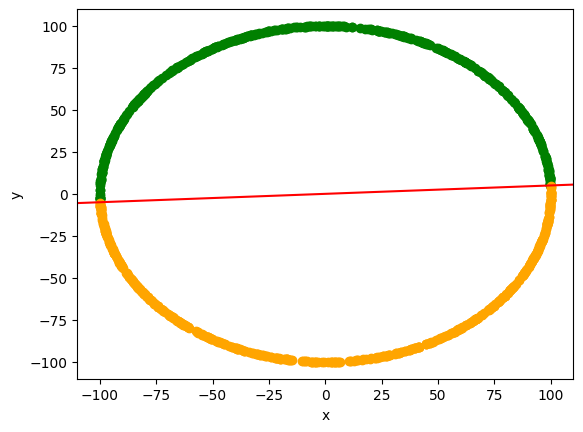

In [126]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E10, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

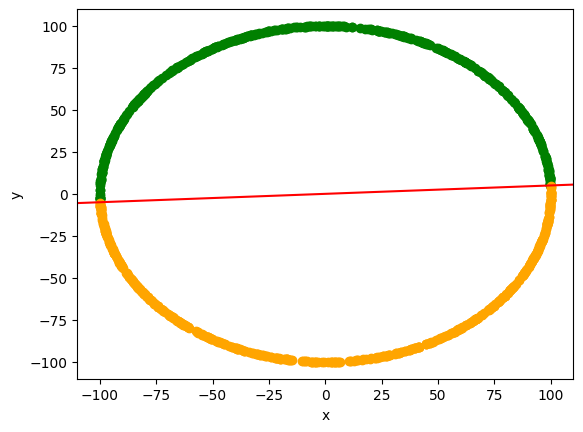

In [127]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E10, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

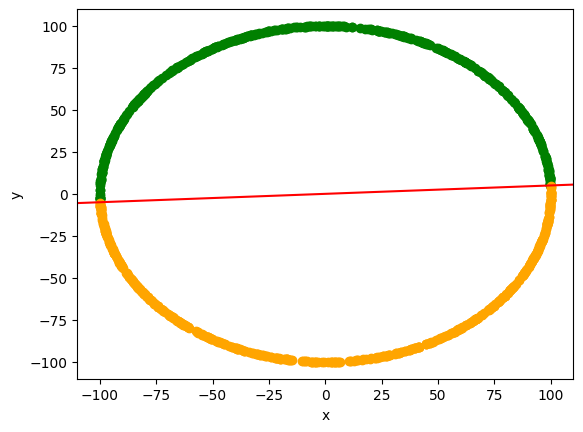

In [128]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E10, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

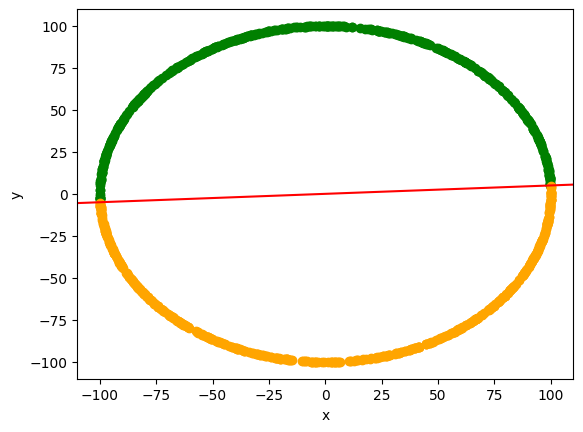

In [129]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E10, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

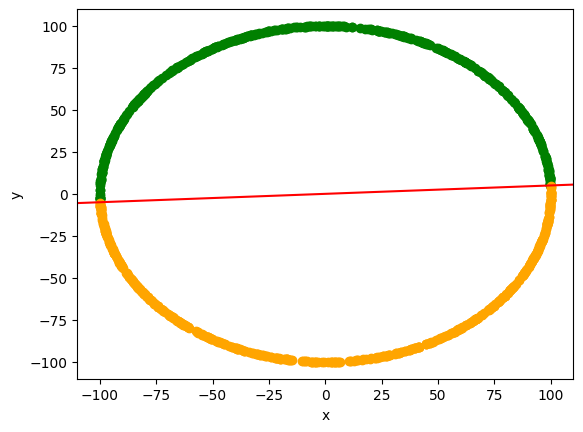

In [130]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E10, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-8</sup></h3>

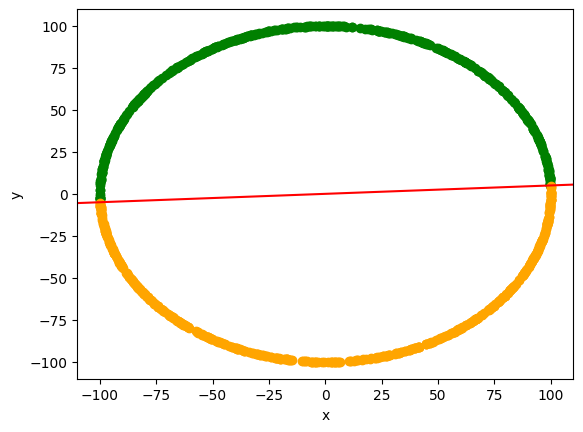

In [131]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E8, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

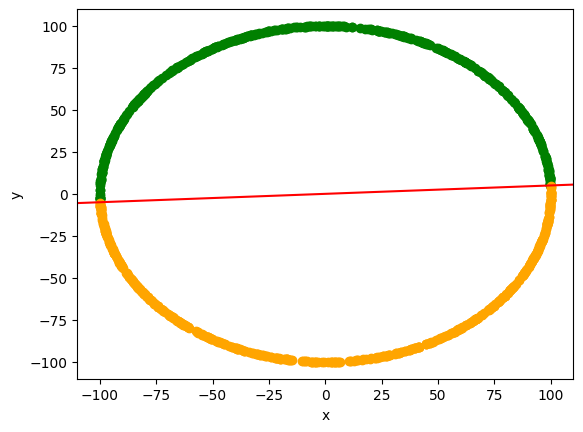

In [132]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E8, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

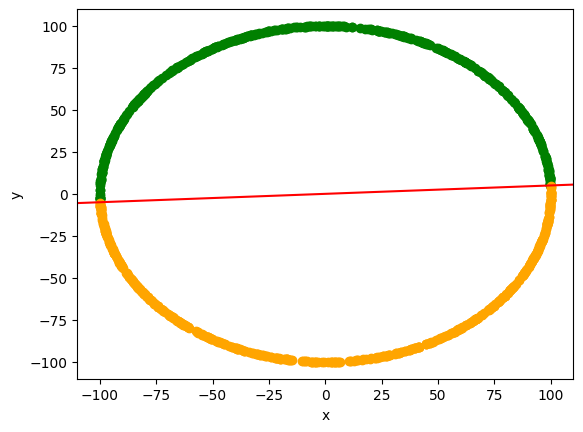

In [133]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E8, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

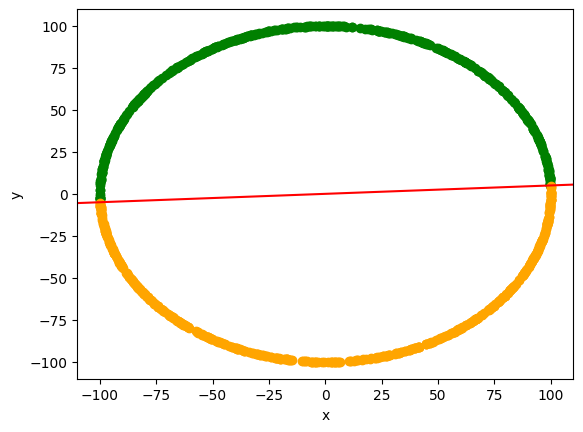

In [134]:
splitSetDraw(PointsSet.C, Precision.FLOAT64, Epsilon.E8, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

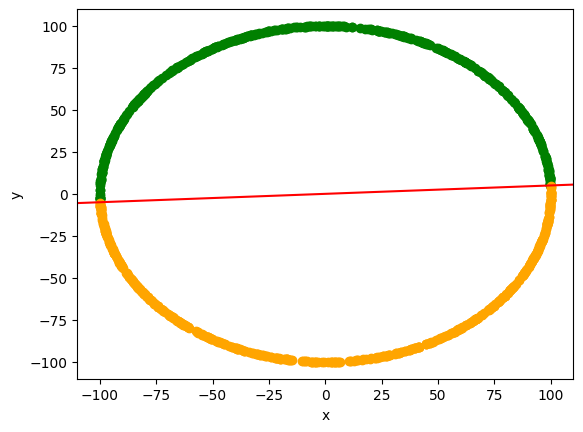

In [135]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E8, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

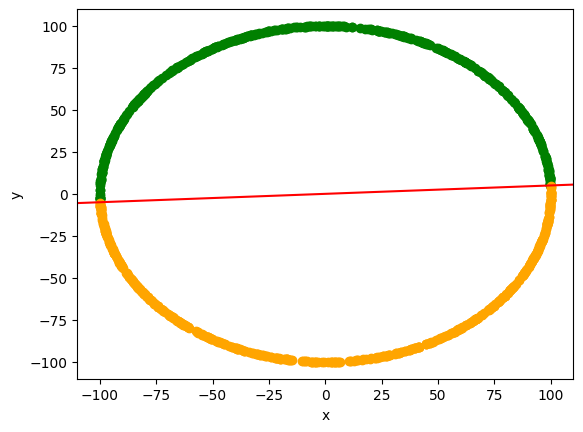

In [136]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E8, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

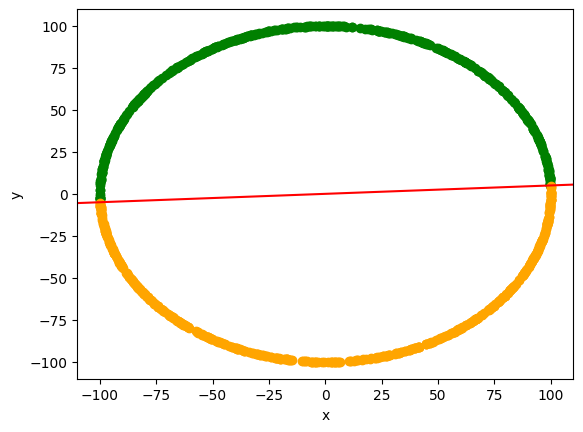

In [137]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E8, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

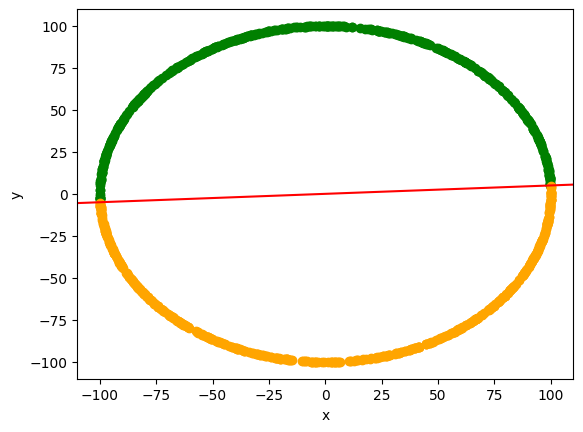

In [138]:
splitSetDraw(PointsSet.C, Precision.FLOAT32, Epsilon.E8, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h2>3.1.4 Zbiór D</h2>

Przedstawmy wyniki dla zbioru D

<h3>Epsilon = 0</h3>

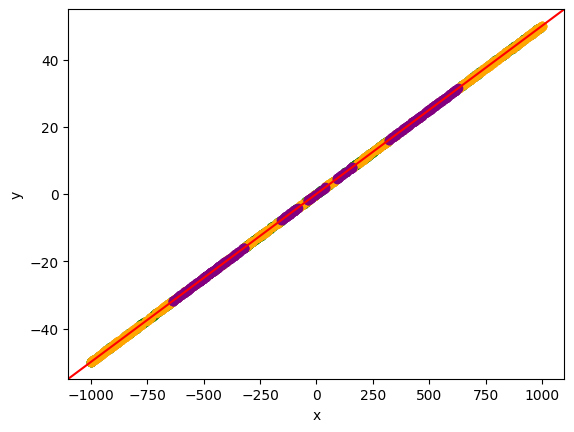

In [139]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.ZERO, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

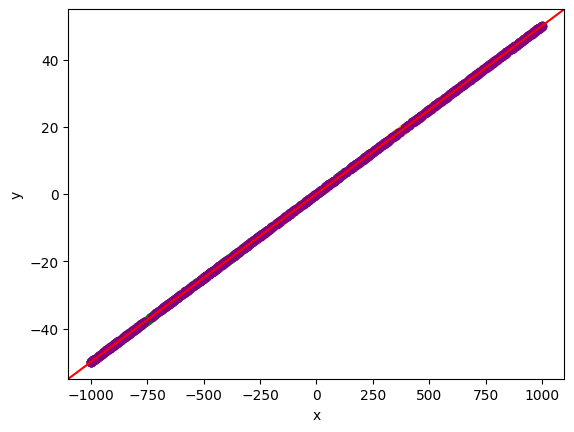

In [140]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.ZERO, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

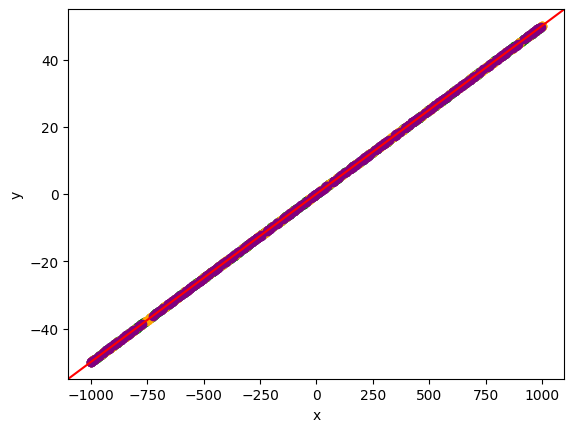

In [141]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.ZERO, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

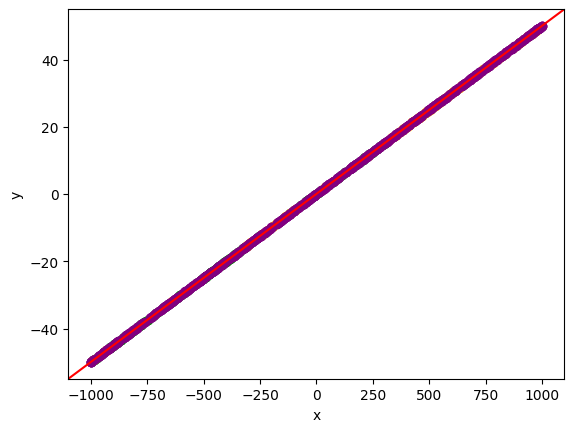

In [142]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.ZERO, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

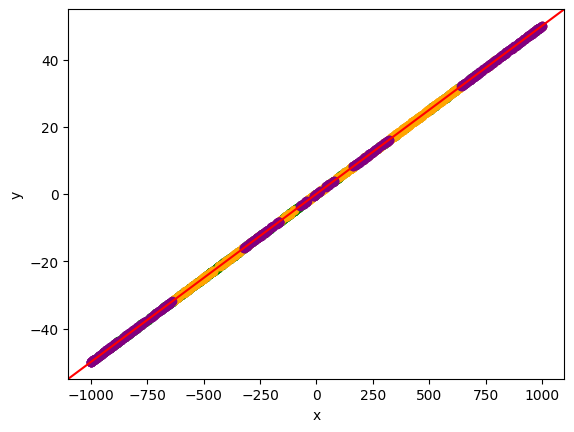

In [143]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.ZERO, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

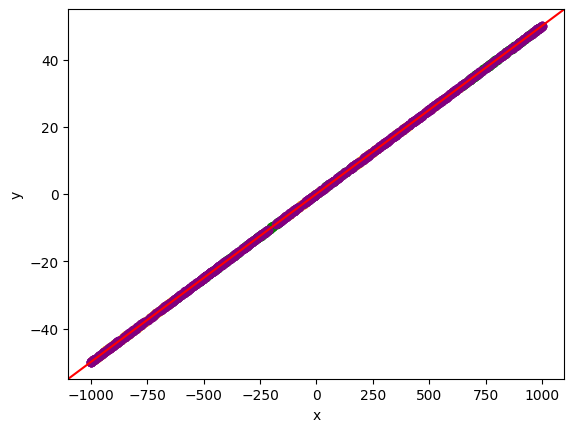

In [144]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.ZERO, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

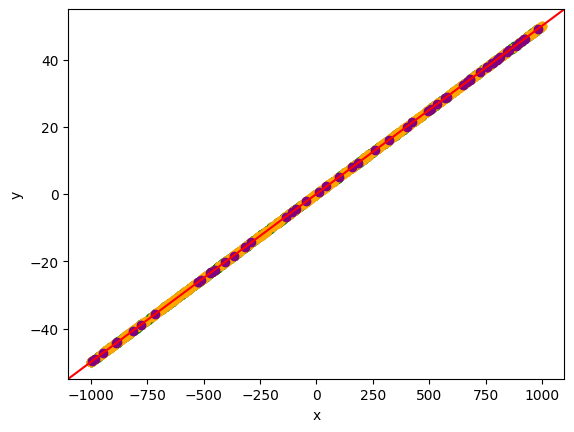

In [145]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.ZERO, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

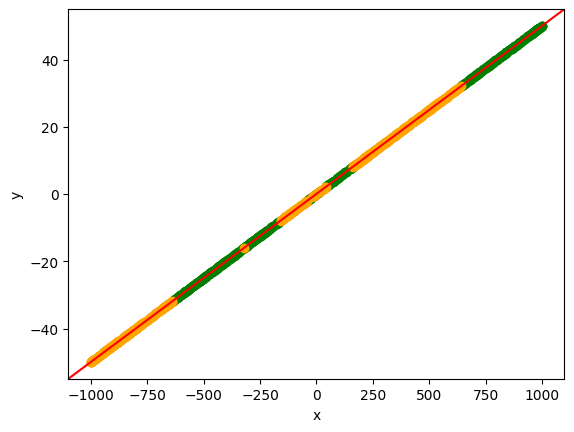

In [146]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.ZERO, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-14</sup></h3>

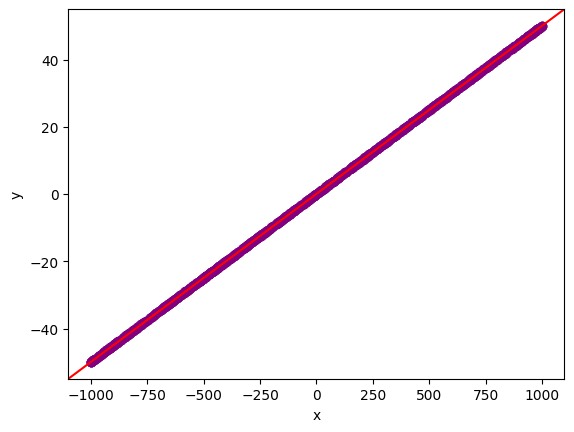

In [147]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E14, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

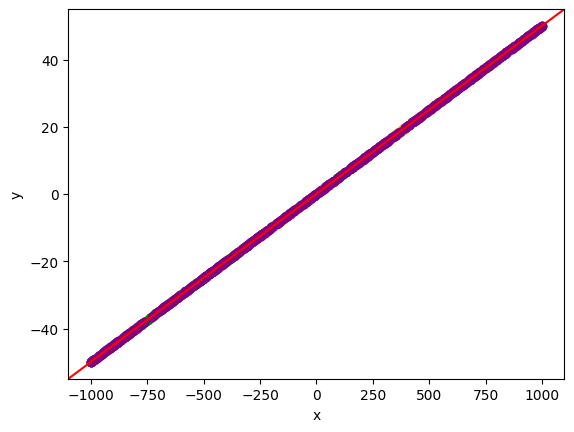

In [148]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E14, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

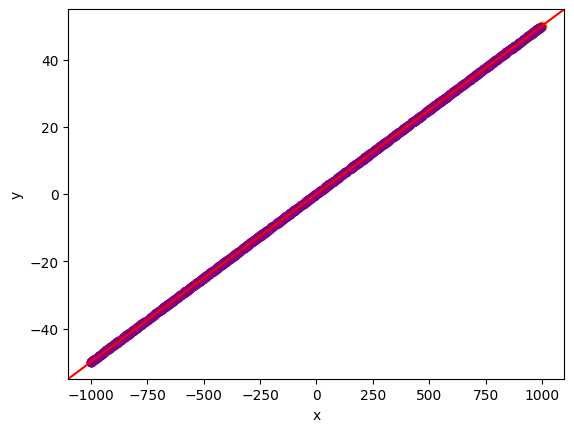

In [149]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E14, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

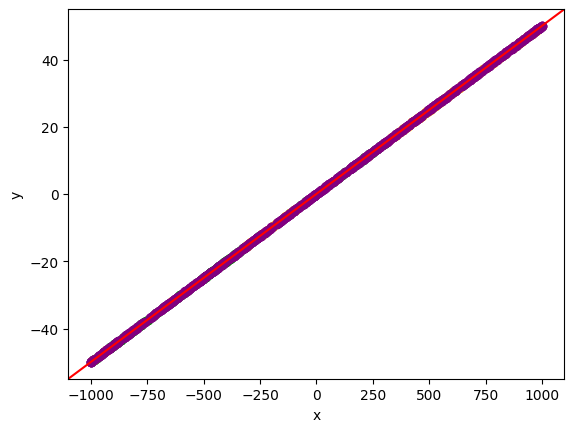

In [150]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E14, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

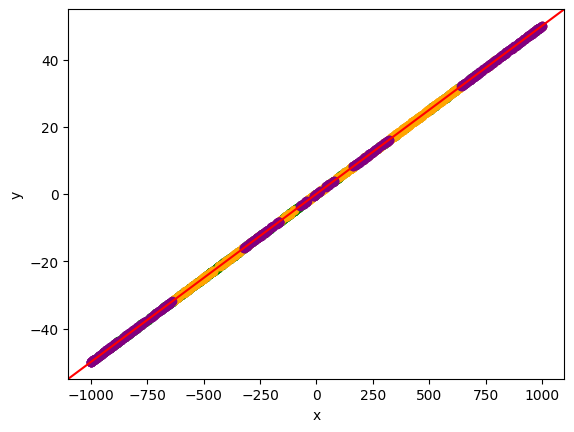

In [151]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E14, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

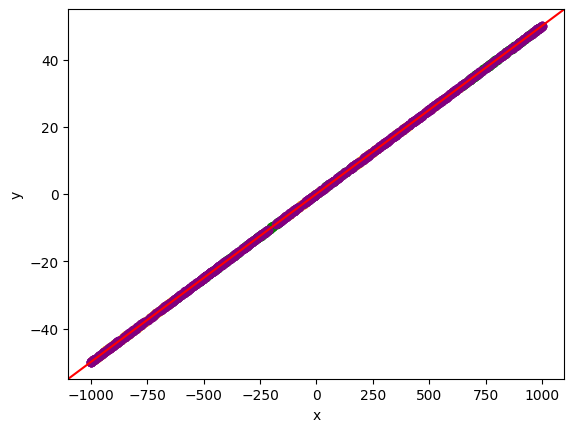

In [152]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E14, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

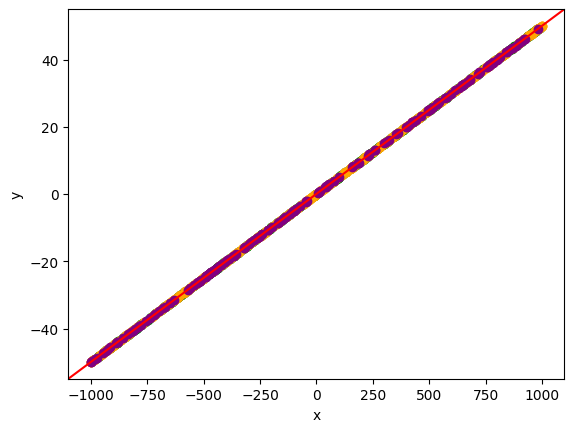

In [153]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E14, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

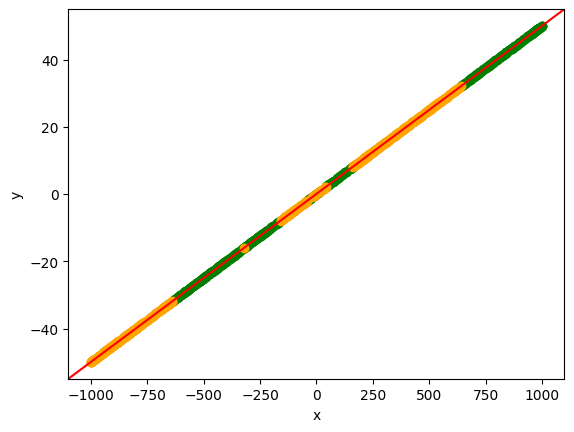

In [154]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E14, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-12</sup></h3>

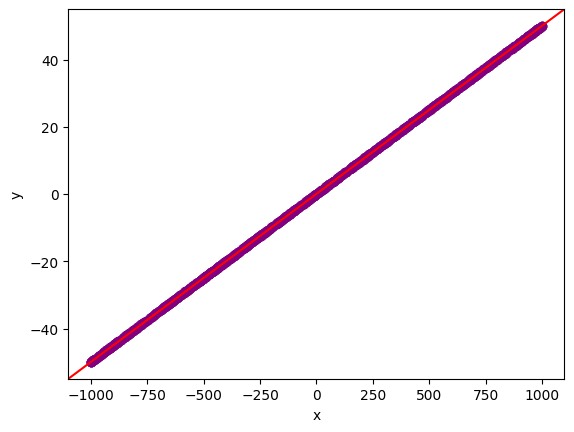

In [155]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E12, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

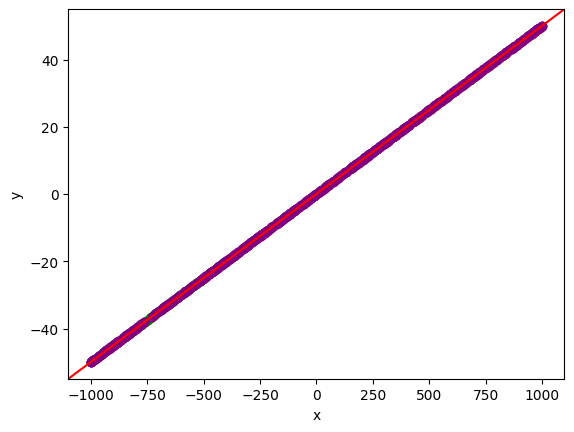

In [156]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E12, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

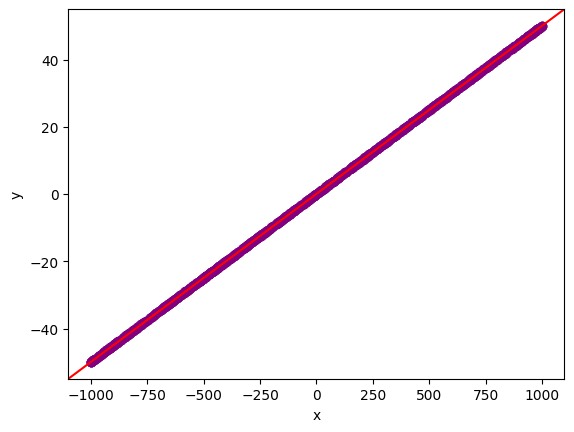

In [157]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E12, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

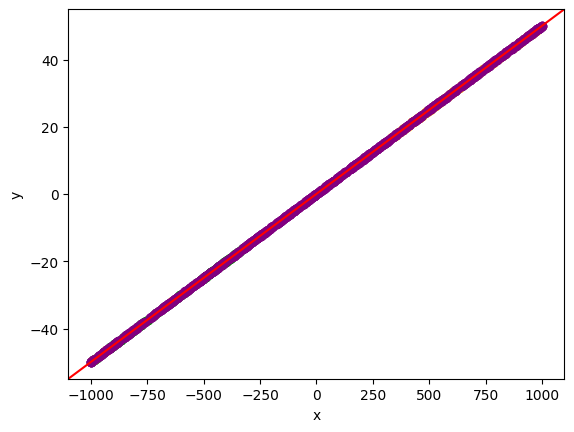

In [158]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E12, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

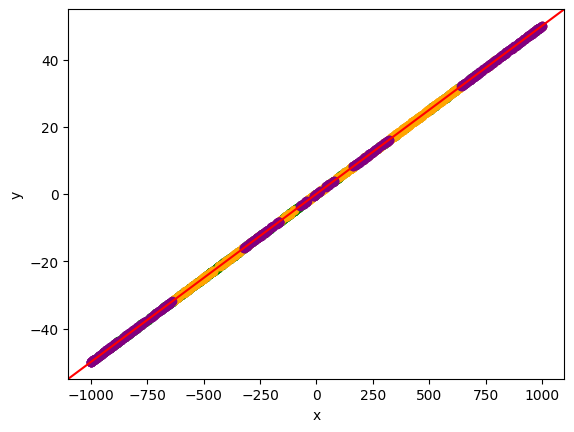

In [159]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E12, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

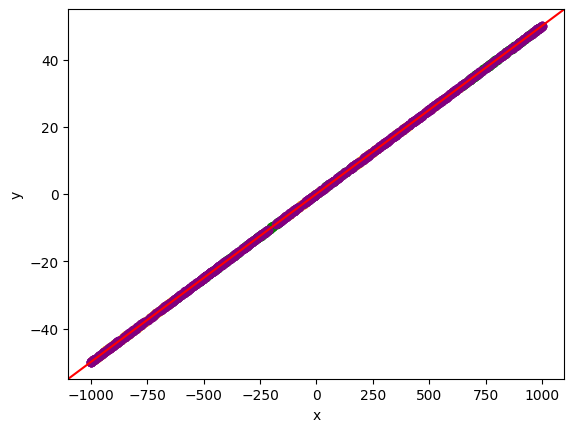

In [160]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E12, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

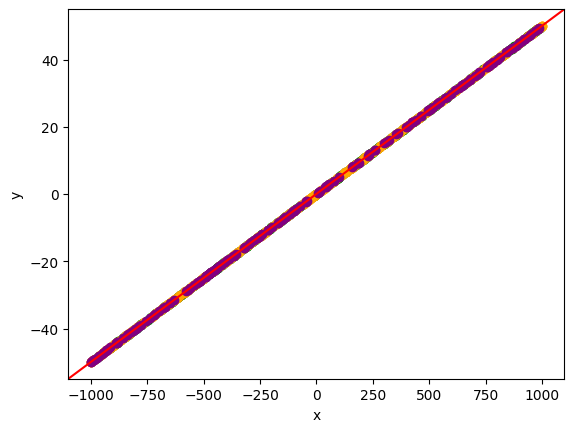

In [161]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E12, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

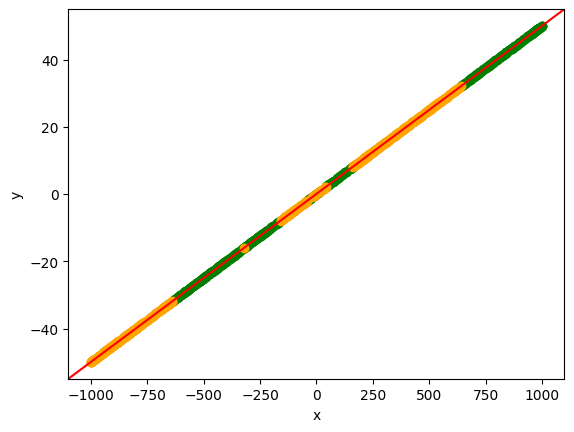

In [162]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E12, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-10</sup></h3>

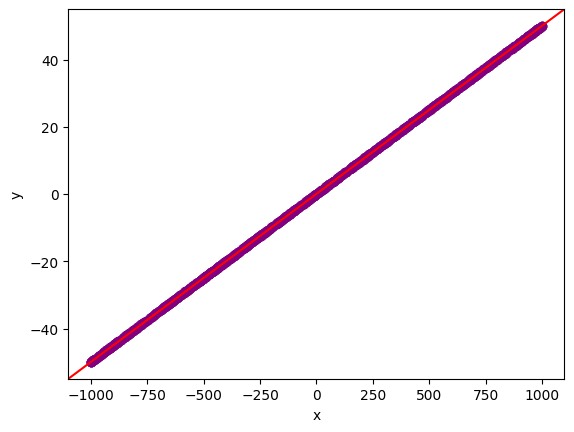

In [163]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E10, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

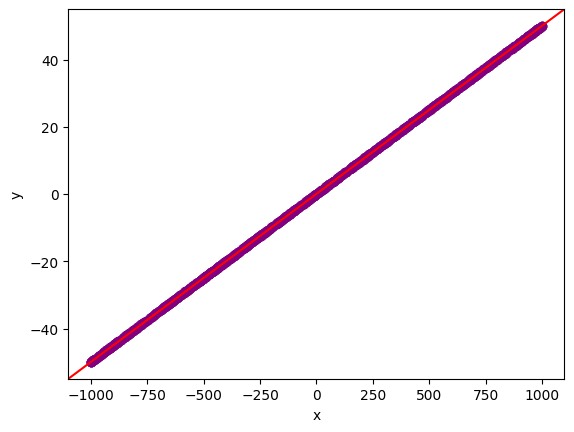

In [164]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E10, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

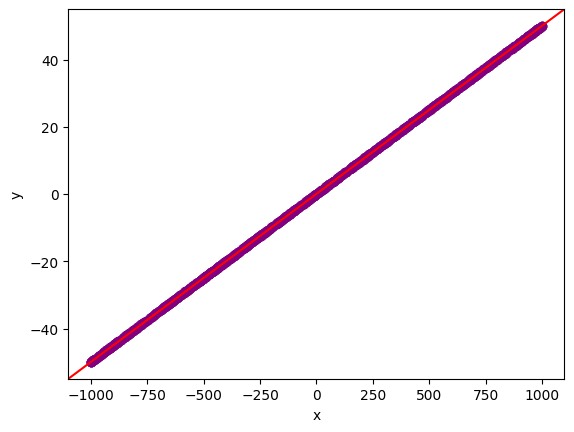

In [165]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E10, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

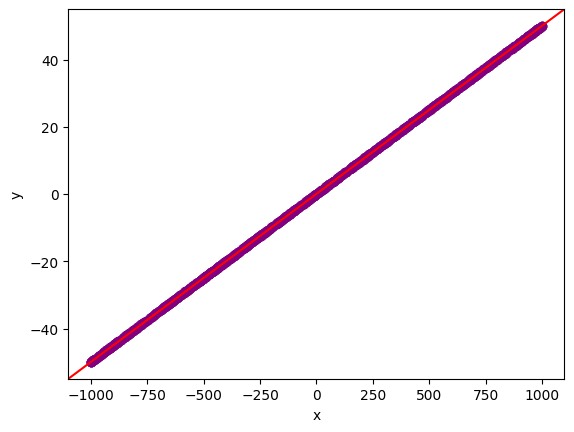

In [166]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E10, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

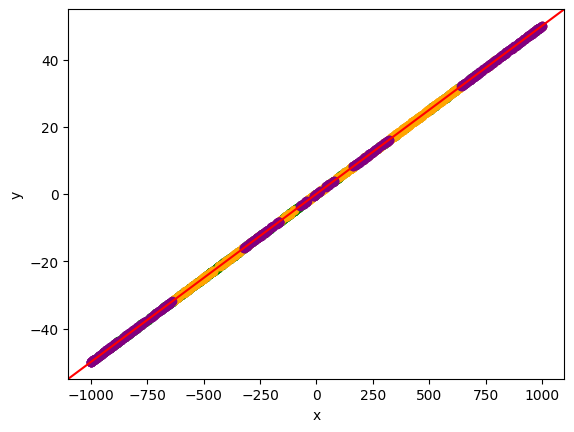

In [167]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E10, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

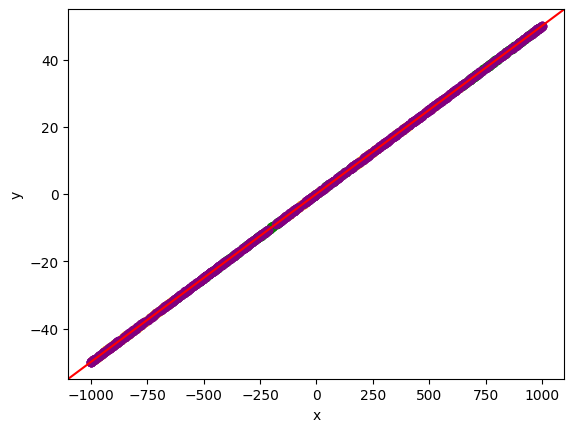

In [168]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E10, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

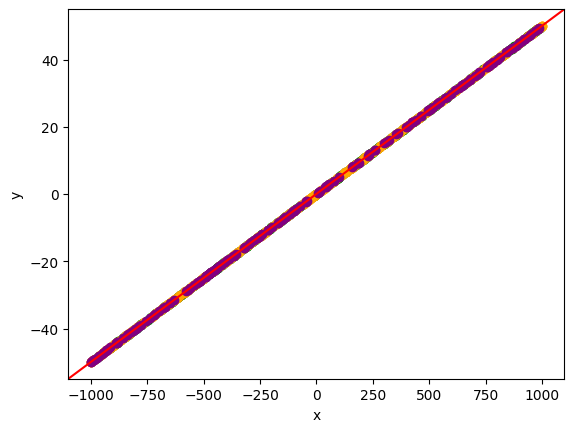

In [169]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E10, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

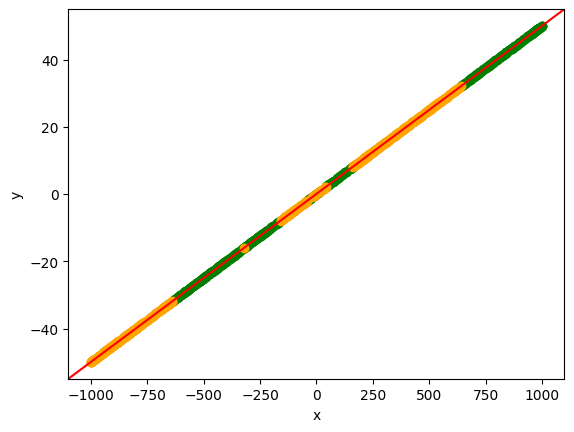

In [170]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E10, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h3>Epsilon = 10<sup>-8</sup></h3>

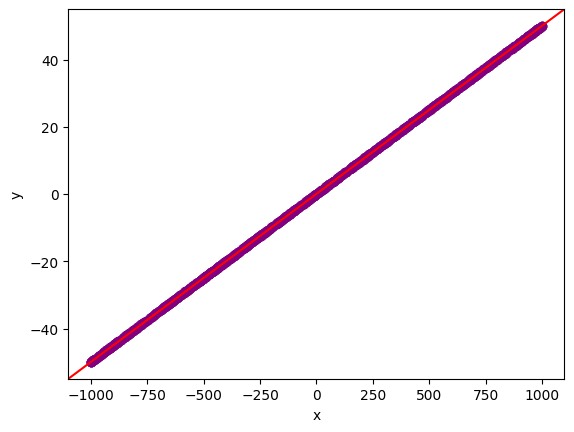

In [171]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E8, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

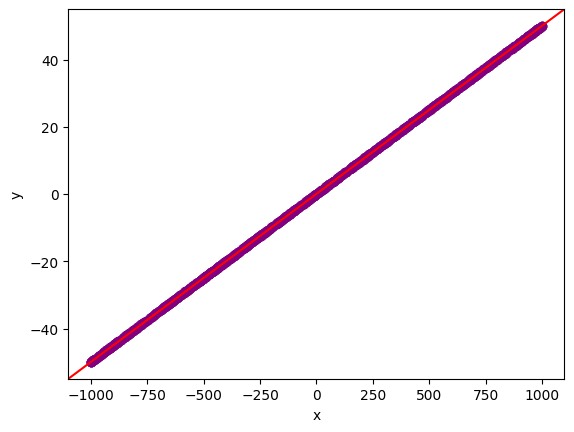

In [172]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E8, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

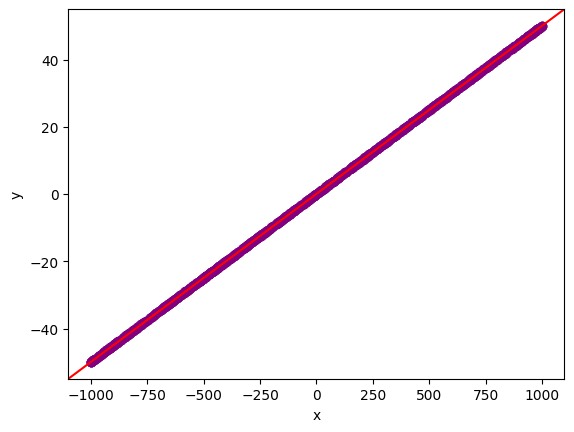

In [173]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E8, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

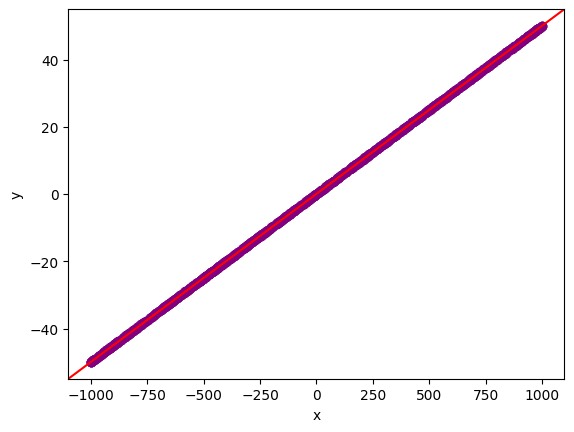

In [174]:
splitSetDraw(PointsSet.D, Precision.FLOAT64, Epsilon.E8, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

<h4>Powtórzmy to samo dla mniejszej precyzji floata (float32), gdyż python standardowo używa precyzji podwójnej (float64)</h4>

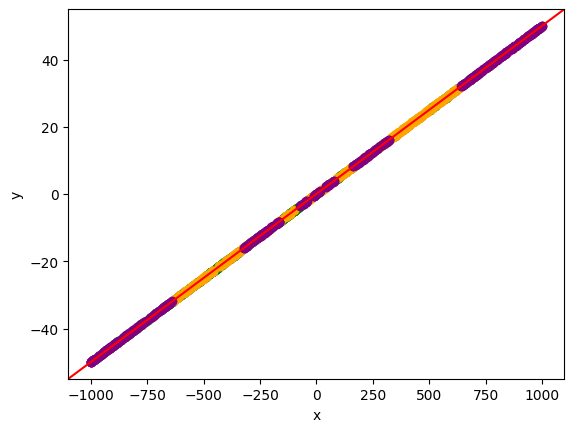

In [175]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E8, DetFunction.MY3)

Wykres dla własnej funkcji obliczania wyznacznika 3x3

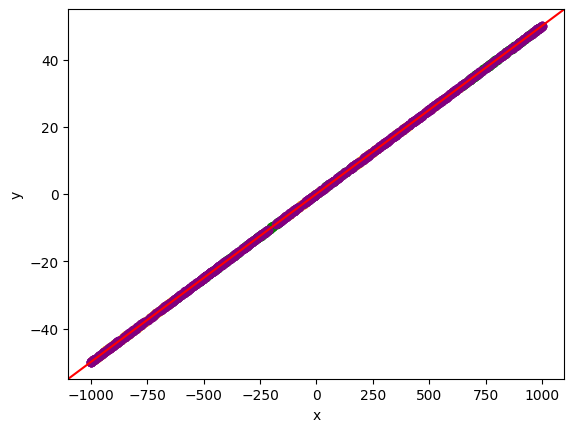

In [176]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E8, DetFunction.MY2)

Wykres dla własnej funkcji obliczania wyznacznika 2x2

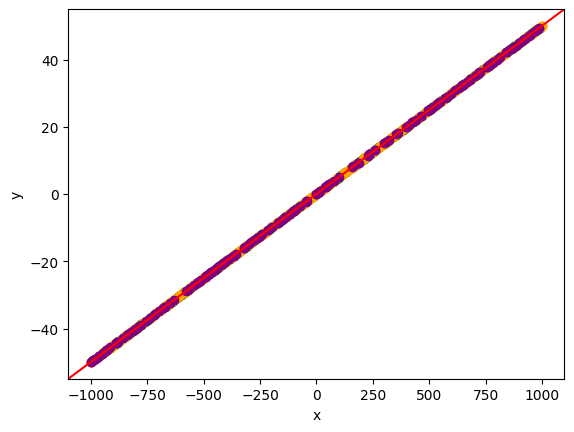

In [177]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E8, DetFunction.LIB3)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 3x3

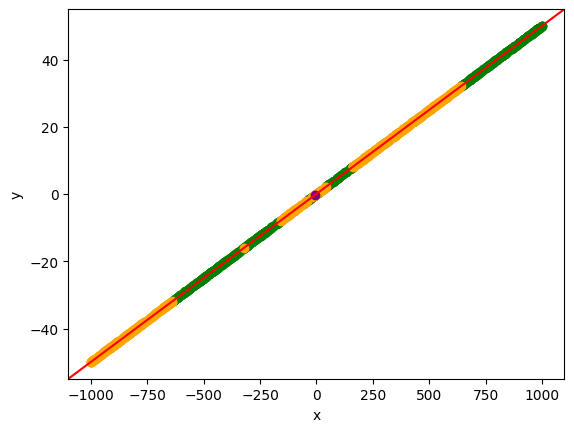

In [178]:
splitSetDraw(PointsSet.D, Precision.FLOAT32, Epsilon.E8, DetFunction.LIB2)

Wykres dla bibliotecznej funkcji obliczania wyznacznika 2x2

# 3.2 Wyniki podziału punktów

<h2>Funkcja "rysowania tabelki" wyników</h2>

In [179]:
# Prints results in a makeshift table
def printResultsTable(pointsSet):
    line0 ="\tdet\t"
    for detF in DetFunction:
        line0 += f"\t{detF.name}\t\t"
    print(line0)
    line1 = "eps\tprec\t"
    for _ in DetFunction:
        line1 += "ABOVE\tBELOW\tON\t"
    print(line1)
    for eps in Epsilon:
        for prec in Precision:
            print(eps.name + "\t" + prec.name, end="\t")
            for detF in DetFunction:
                for amount in results.getData(pointsSet, prec, eps, detF):
                    print(amount, end="\t")
            print()

<h2>Wyniki dla zbioru A</h2>

In [180]:
printResultsTable(PointsSet.A)

	det		MY3			MY2			LIB3			LIB2		
eps	prec	ABOVE	BELOW	ON	ABOVE	BELOW	ON	ABOVE	BELOW	ON	ABOVE	BELOW	ON	
ZERO	FLOAT64	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
ZERO	FLOAT32	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
E14	FLOAT64	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
E14	FLOAT32	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
E12	FLOAT64	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
E12	FLOAT32	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
E10	FLOAT64	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
E10	FLOAT32	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
E8	FLOAT64	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	
E8	FLOAT32	49986	50014	0	49986	50014	0	49986	50014	0	49986	50014	0	


<h2>Wyniki dla zbioru B</h2>

In [181]:
printResultsTable(PointsSet.B)

	det		MY3			MY2			LIB3			LIB2		
eps	prec	ABOVE	BELOW	ON	ABOVE	BELOW	ON	ABOVE	BELOW	ON	ABOVE	BELOW	ON	
ZERO	FLOAT64	49973	50027	0	49969	50023	8	49973	50027	0	49972	50024	4	
ZERO	FLOAT32	49973	50027	0	0	0	100000	49973	50027	0	6591	6442	86967	
E14	FLOAT64	49973	50027	0	49969	50023	8	49973	50027	0	49972	50024	4	
E14	FLOAT32	49973	50027	0	0	0	100000	49973	50027	0	6591	6442	86967	
E12	FLOAT64	49973	50027	0	49969	50023	8	49973	50027	0	49972	50024	4	
E12	FLOAT32	49973	50027	0	0	0	100000	49973	50027	0	6591	6442	86967	
E10	FLOAT64	49973	50027	0	49969	50023	8	49973	50027	0	49972	50024	4	
E10	FLOAT32	49973	50027	0	0	0	100000	49973	50027	0	6591	6442	86967	
E8	FLOAT64	49973	50027	0	49969	50023	8	49973	50027	0	49972	50024	4	
E8	FLOAT32	49973	50027	0	0	0	100000	49973	50027	0	6591	6442	86967	


<h2>Wyniki dla zbioru C</h2>

In [182]:
printResultsTable(PointsSet.C)

	det		MY3			MY2			LIB3			LIB2		
eps	prec	ABOVE	BELOW	ON	ABOVE	BELOW	ON	ABOVE	BELOW	ON	ABOVE	BELOW	ON	
ZERO	FLOAT64	480	520	0	480	520	0	480	520	0	480	520	0	
ZERO	FLOAT32	480	520	0	480	520	0	480	520	0	480	520	0	
E14	FLOAT64	480	520	0	480	520	0	480	520	0	480	520	0	
E14	FLOAT32	480	520	0	480	520	0	480	520	0	480	520	0	
E12	FLOAT64	480	520	0	480	520	0	480	520	0	480	520	0	
E12	FLOAT32	480	520	0	480	520	0	480	520	0	480	520	0	
E10	FLOAT64	480	520	0	480	520	0	480	520	0	480	520	0	
E10	FLOAT32	480	520	0	480	520	0	480	520	0	480	520	0	
E8	FLOAT64	480	520	0	480	520	0	480	520	0	480	520	0	
E8	FLOAT32	480	520	0	480	520	0	480	520	0	480	520	0	


<h2>Wyniki dla zbioru D</h2>

In [183]:
printResultsTable(PointsSet.D)

	det		MY3			MY2			LIB3			LIB2		
eps	prec	ABOVE	BELOW	ON	ABOVE	BELOW	ON	ABOVE	BELOW	ON	ABOVE	BELOW	ON	
ZERO	FLOAT64	266	386	348	158	137	705	402	269	329	180	144	676	
ZERO	FLOAT32	304	304	392	182	144	674	481	462	57	515	485	0	
E14	FLOAT64	0	0	1000	147	132	721	46	41	913	171	141	688	
E14	FLOAT32	304	304	392	182	144	674	399	418	183	515	485	0	
E12	FLOAT64	0	0	1000	93	69	838	0	0	1000	129	98	773	
E12	FLOAT32	304	304	392	182	144	674	386	406	208	515	485	0	
E10	FLOAT64	0	0	1000	0	0	1000	0	0	1000	0	0	1000	
E10	FLOAT32	304	304	392	182	144	674	386	406	208	515	485	0	
E8	FLOAT64	0	0	1000	0	0	1000	0	0	1000	0	0	1000	
E8	FLOAT32	303	304	393	182	144	674	384	406	210	514	485	1	
